<header style="background-color:rgb(237,237,237);padding:15px;border-radius:5px">
    <h2 style="font-size:40px;text-align:center;" >Final Project</h2>
    <hr style="display: block;border-width: 1px;border-style:inset;">
    <h2 style="font-size:30px;text-align:left;" >Group members :</h2>
    <h3 style="font-size:15px;">&emsp; Sahil Rajapkar</h3>
    <h3 style="font-size:15px;">&emsp; Sajin Shajee</h3>
    <h3 style="font-size:15px;">&emsp; Jose Viteri</h3>
</header>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Installing necessary packages</p>

In [2]:
# install.packages('mlbench')
# install.packages('caret')
# install.packages('lifecycle',version='1.0.3')
# install.packages('vctrs',version='0.5.0')
# install.packages("randomForest")
# install.packages('xgboost')
# install.packages("tictoc")
# install.packages("glmnet")

In [3]:
library(tidyverse)
library(mlbench)
library(caret)
library(repr)
library(randomForest)
library(xgboost)
library(tictoc)
library(glmnet)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
"package 'mlbench' was built under R version 4.2.2"
Warning message:
"package 'caret' was built under R version 4.2.2"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'randomForest' was built under R version 4.2.2"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The foll

In [4]:
memory.limit(size = 70000) 

Warning message:
"'memory.limit()' is no longer supported"


[1] Inf

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Importing our data</p>

In [5]:
sales_Data <- read.csv('competitive-data-science-predict-future-sales/sales_train.csv')
testData <- read.csv('competitive-data-science-predict-future-sales/test.csv')
itemsData <- read.csv('competitive-data-science-predict-future-sales/items.csv')
shopsData <- read.csv('competitive-data-science-predict-future-sales/shops.csv')
itemsCatData <- read.csv('competitive-data-science-predict-future-sales/item_categories.csv')

In [6]:
head(sales_Data)

date       date_block_num shop_id item_id item_price item_cnt_day
1 02.01.2013 0              59      22154    999.00     1          
2 03.01.2013 0              25       2552    899.00     1          
3 05.01.2013 0              25       2552    899.00    -1          
4 06.01.2013 0              25       2554   1709.05     1          
5 15.01.2013 0              25       2555   1099.00     1          
6 10.01.2013 0              25       2564    349.00     1

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Formatting our date column</p>

In [7]:
sales_Data$date<-as.Date(sales_Data$date,format = "%d.%m.%Y")
sales_Data<-sales_Data %>% arrange(sales_Data$date)

<p style="background-color:rgb(20,21,24);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">Data exploration</p>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Generating a dataframe that counts the number of item solds per shop</p>

In [8]:
df<-c()
# nrow(sales_Data)
summary(sales_Data)
shops <- sort(unique(sales_Data$shop_id))
for(shop in shops){   
    df<-rbind(df,c(shop,sum(sales_Data[which(sales_Data$shop_id==shop), 6])))
#     cat(shop,"\t",df,"\n")
}
# head(df)
summary(df)

      date            date_block_num     shop_id      item_id     
 Min.   :2013-01-01   Min.   : 0.00   Min.   : 0   Min.   :    0  
 1st Qu.:2013-08-01   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Median :2014-03-04   Median :14.00   Median :31   Median : 9343  
 Mean   :2014-04-03   Mean   :14.57   Mean   :33   Mean   :10197  
 3rd Qu.:2014-12-05   3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
 Max.   :2015-10-31   Max.   :33.00   Max.   :59   Max.   :22169  
   item_price        item_cnt_day     
 Min.   :    -1.0   Min.   : -22.000  
 1st Qu.:   249.0   1st Qu.:   1.000  
 Median :   399.0   Median :   1.000  
 Mean   :   890.9   Mean   :   1.243  
 3rd Qu.:   999.0   3rd Qu.:   1.000  
 Max.   :307980.0   Max.   :2169.000  

       V1              V2        
 Min.   : 0.00   Min.   :   330  
 1st Qu.:14.75   1st Qu.: 23333  
 Median :29.50   Median : 50176  
 Mean   :29.50   Mean   : 60803  
 3rd Qu.:44.25   3rd Qu.: 69562  
 Max.   :59.00   Max.   :310777  

Warning message in plot.window(xlim, ylim, log = log, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"graphical parameter "type" is obsolete"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"graphical parameter "type" is obsolete"



Shop ID 31 sold the most items based on the histogram:

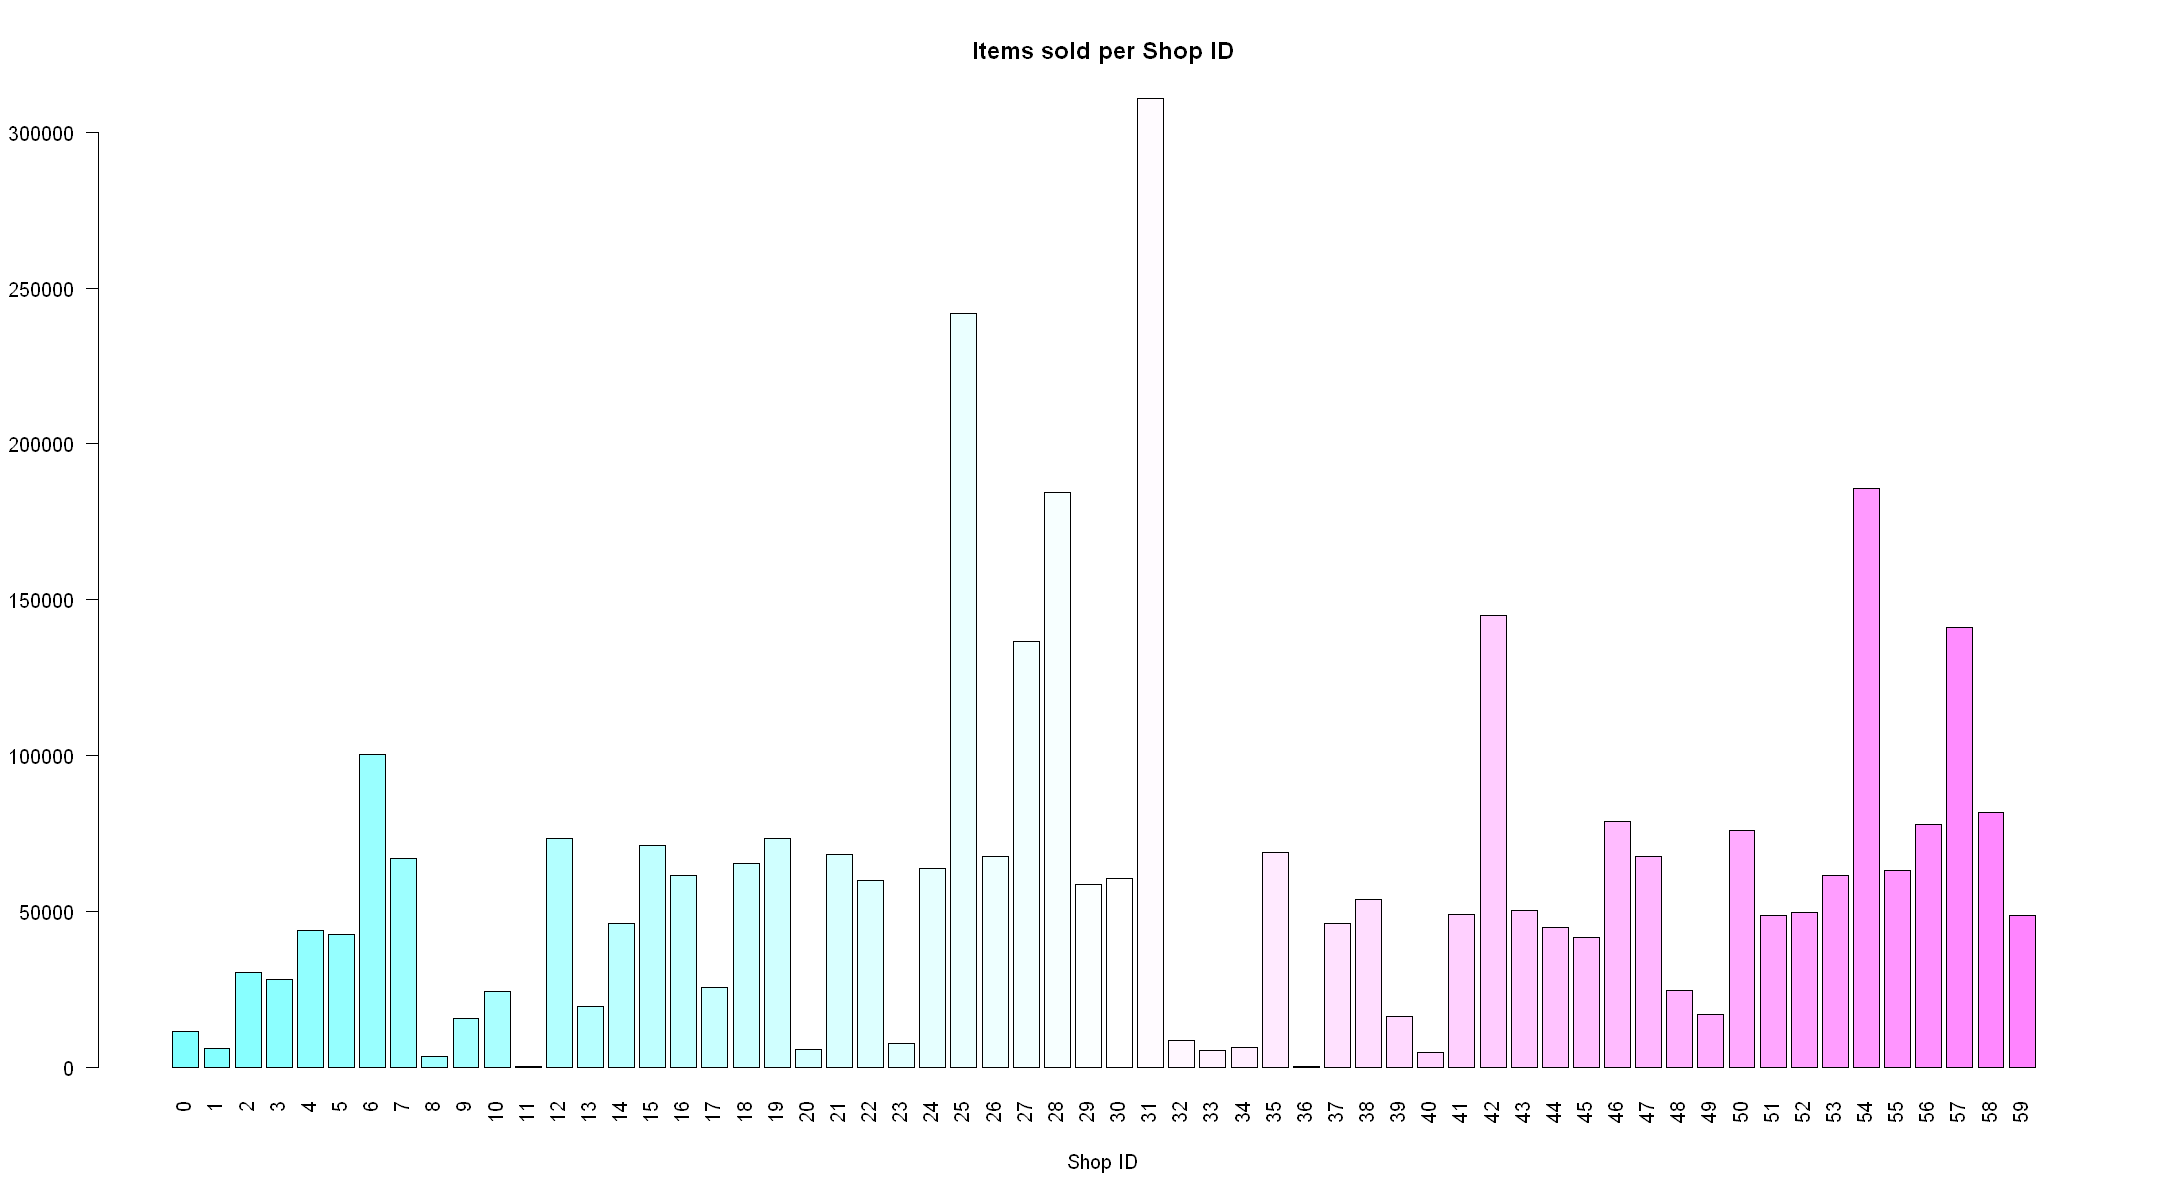

In [9]:
options(repr.plot.width=18, repr.plot.height=10)
barplot(df[,2] ~ df[,1],type="h",ylab="",xlab="Shop ID",main="Items sold per Shop ID",las=2,cex.names=1,col=cm.colors(61))
cat('\nShop ID 31 sold the most items based on the histogram:')

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Generating a dataframe to view monthly sales</p>

In [10]:
months <- sort(unique(sales_Data$date_block_num))
df2 <-c()
for(month in months){   
    df2<-rbind(df2,c(month,sum(sales_Data[which(sales_Data$date_block_num==month), 6])))
#     cat(shop,"\t",df,"\n")
}
head(df2)
summary(df2)

[,1] [,2]  
[1,] 0    131479
[2,] 1    128090
[3,] 2    147142
[4,] 3    107190
[5,] 4    106970
[6,] 5    125381

       V1              V2        
 Min.   : 0.00   Min.   : 63187  
 1st Qu.: 8.25   1st Qu.: 85969  
 Median :16.50   Median :107306  
 Mean   :16.50   Mean   :107300  
 3rd Qu.:24.75   3rd Qu.:125359  
 Max.   :33.00   Max.   :183342  

Warning message in plot.window(xlim, ylim, log = log, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"graphical parameter "type" is obsolete"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"graphical parameter "type" is obsolete"



The months that the most sales are 12 and 24:

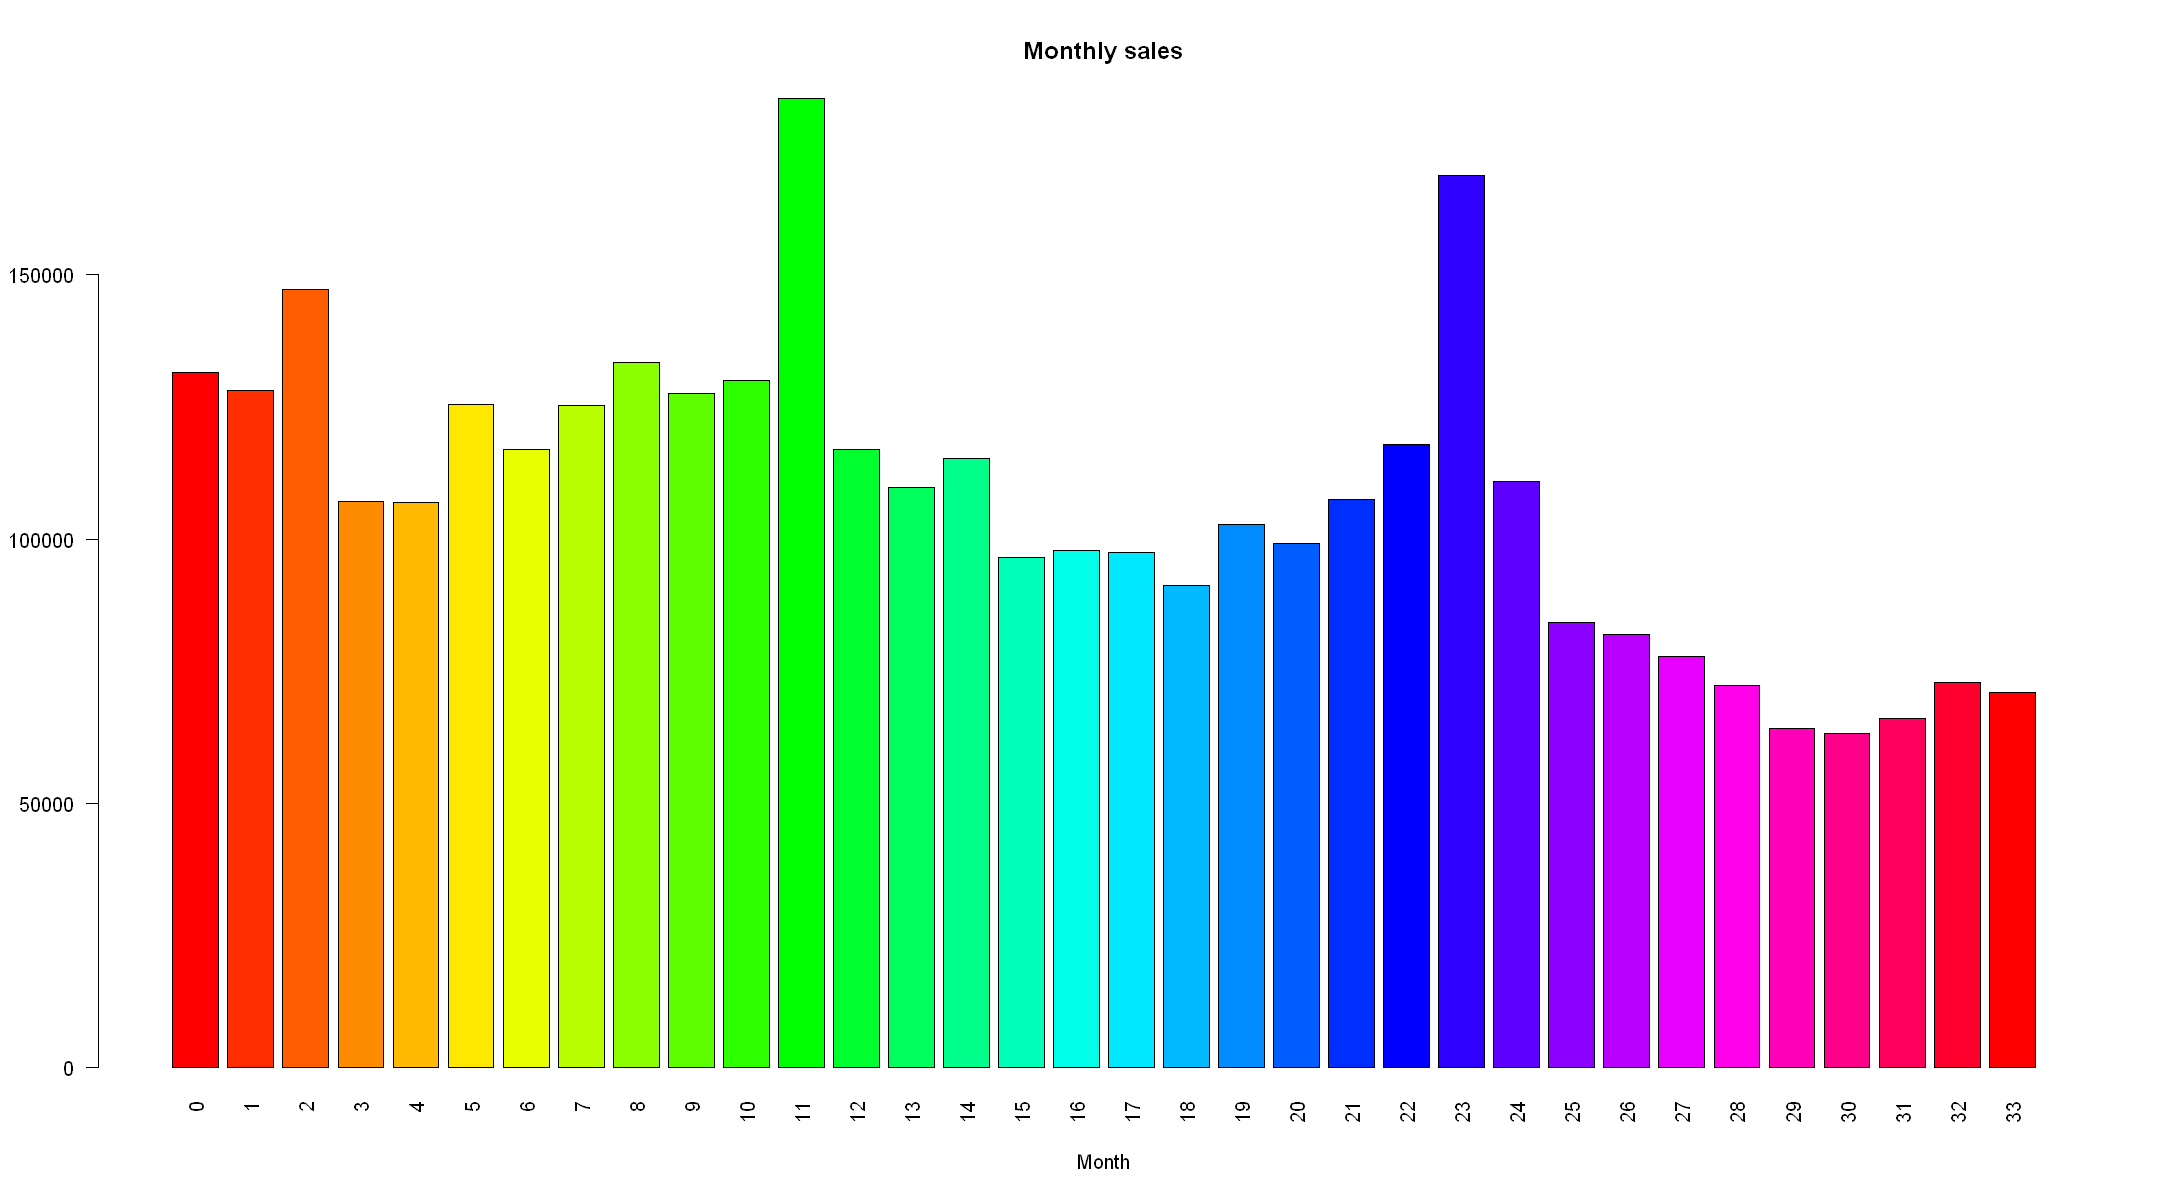

In [11]:
options(repr.plot.width=18, repr.plot.height=10)
barplot(df2[,2] ~ df2[,1],type="h",ylab="",xlab="Month",main="Monthly sales",las=2,cex.names=1,col=rainbow(33))
cat('\nThe months that the most sales are 12 and 24:')

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Exploring the item prices vs ID</p>


There are a couple of items that are above all the others, we will consider this an outlier:

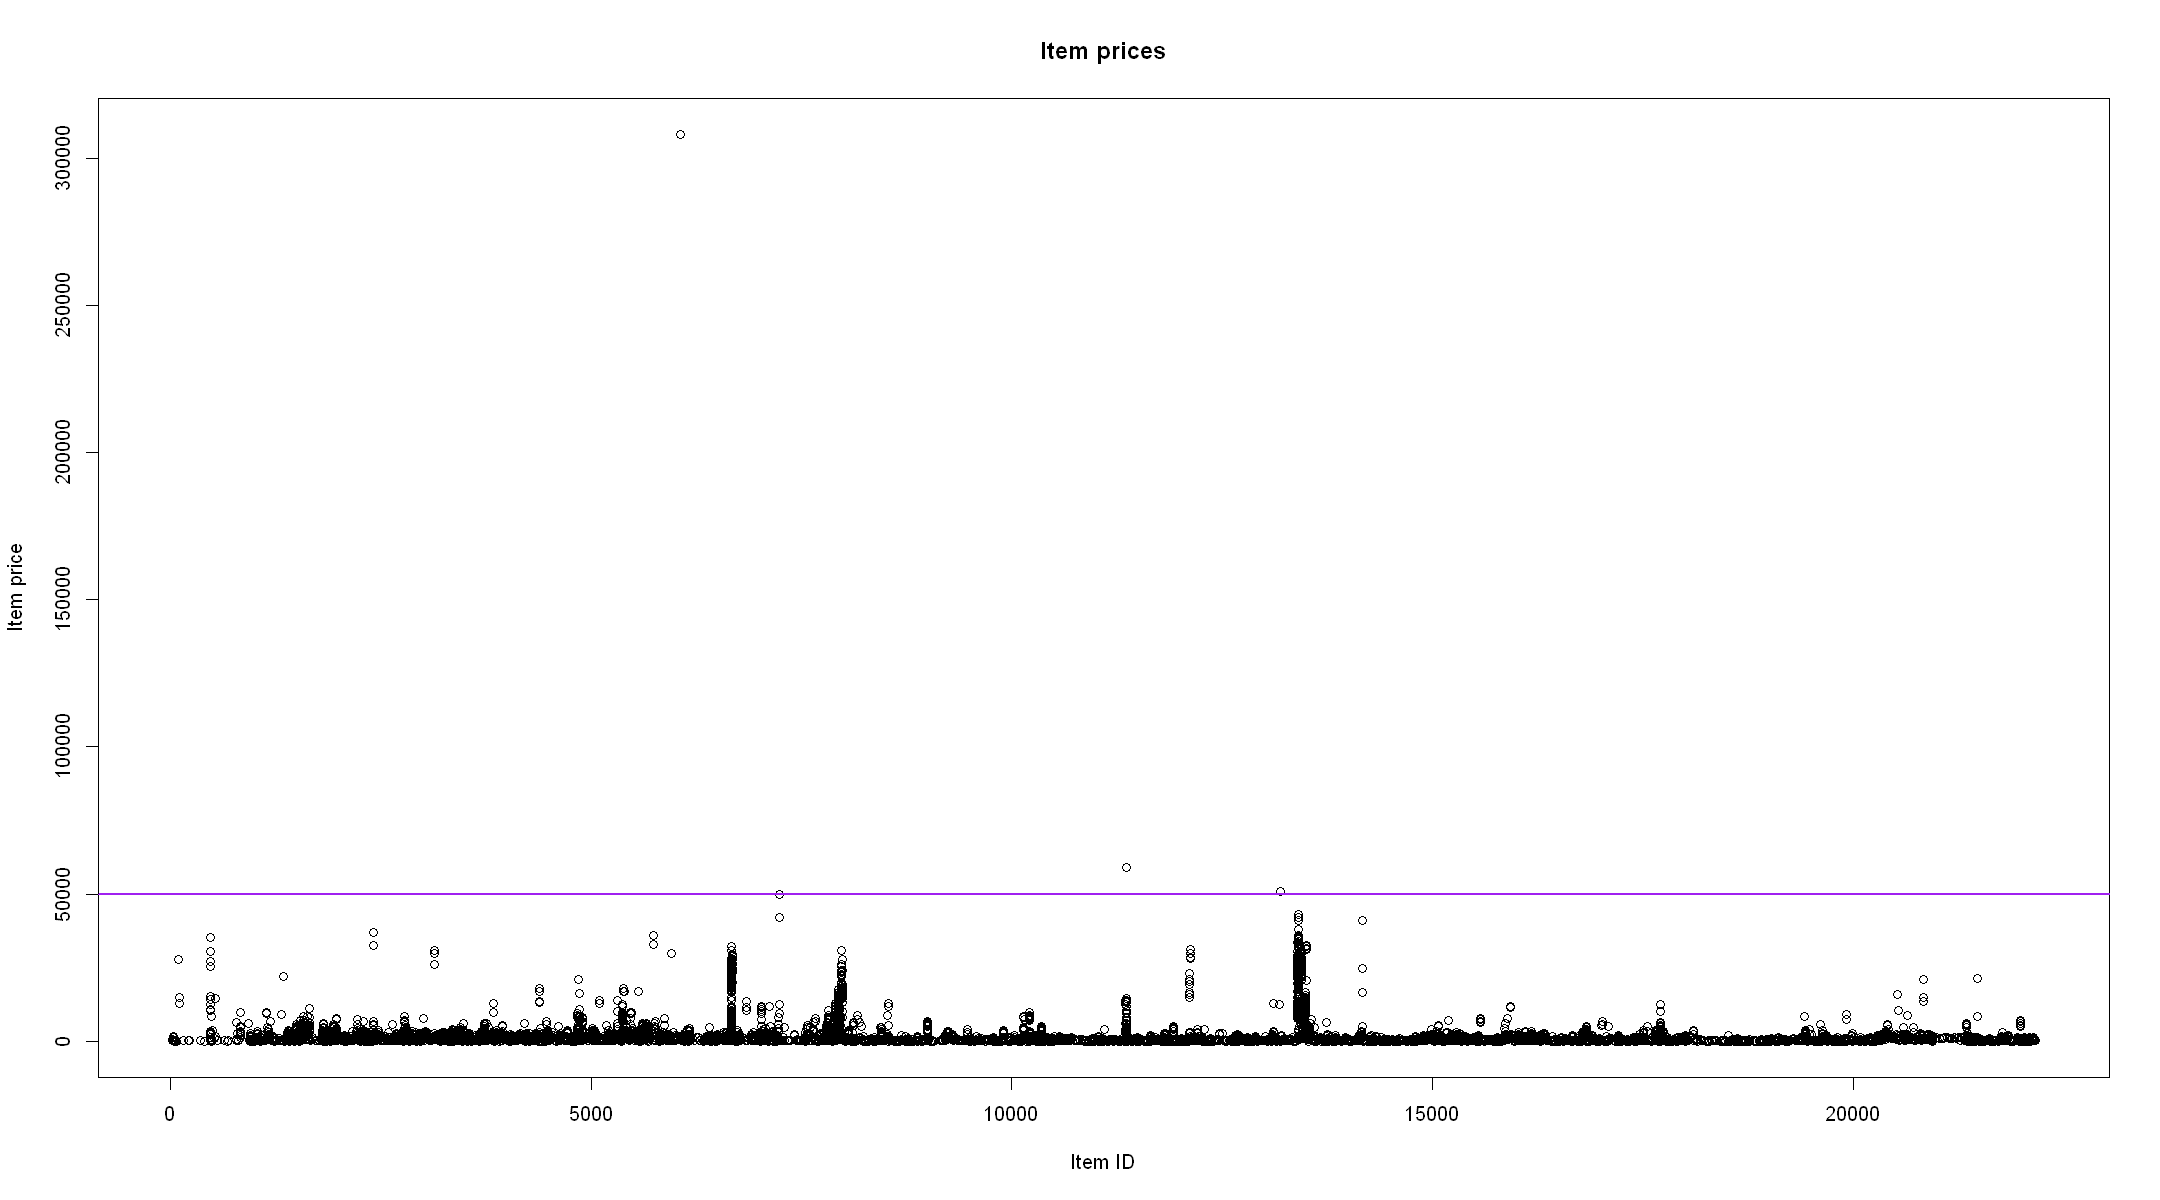

In [12]:
# Removing duplicated item prices from dataframe
unique_sales_data <- sales_Data[!duplicated(sales_Data$item_price), ]
plot(unique_sales_data$item_id, unique_sales_data$item_price,ylab="Item price",xlab="Item ID",main="Item prices")
abline(h=c(50000), lwd=2, col="purple")
cat('\nThere are a couple of items that are above all the others, we will consider this an outlier:')

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Removing duplicate shop IDs as well as outliers</p>

In [13]:
train_daily<-sales_Data%>%inner_join(itemsData,by = "item_id")%>%filter((item_price<45000)&(item_cnt_day < 1000)&(item_price > 0) & (item_cnt_day >= 0))%>%transmute(date,date_block_num,shop_id,item_category_id, item_id, item_price, item_cnt_day,revenue=item_price*item_cnt_day)
train_daily[train_daily['shop_id'] == 0, 'shop_id'] = 57
train_daily[train_daily['shop_id']== 1, 'shop_id'] = 58
train_daily[train_daily['shop_id'] == 11, 'shop_id'] = 10
train_daily[train_daily['shop_id'] == 40, 'shop_id'] = 39
head(train_daily)

date       date_block_num shop_id item_category_id item_id item_price
1 2013-01-01 0              19      40               18976   399       
2 2013-01-01 0              19      55               18284   199       
3 2013-01-01 0              19      55               18320   199       
4 2013-01-01 0              19      55               18329   299       
5 2013-01-01 0              19      62               19367   399       
6 2013-01-01 0              19      40               18823   299       
  item_cnt_day revenue
1 1            399    
2 1            199    
3 1            199    
4 1            299    
5 1            399    
6 1            299

In [14]:
train_monthly<-train_daily%>%transmute(date_block_num,shop_id, item_category_id, item_id,item_cnt_day,item_price,revenue)%>%group_by(date_block_num,shop_id, item_category_id, item_id)%>%summarize(item_cnt_month=sum(item_cnt_day),mean_item_cnt=mean(item_cnt_day),mean_item_price=mean(item_price),revenue_month=sum(revenue))
head(train_monthly)

`summarise()` has grouped output by 'date_block_num', 'shop_id', 'item_category_id'. You can override using the
`.groups` argument.


date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              2       2                5572    9              1.285714     
2 0              2       2                5573    2              1.000000     
3 0              2       2                5575    4              1.000000     
4 0              2       2                5576    3              1.000000     
5 0              2       2                5632    1              1.000000     
6 0              2       2                5633    1              1.000000     
  mean_item_price revenue_month
1 1532.857        13910.00     
2  924.000         1848.00     
3  955.005         3820.02     
4 2490.000         7470.00     
5 2390.000         2390.00     
6 2298.000         2298.00

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Our test data will be assigned to date_block_num 34, we are now moving this into its own dataframe</p>

In [15]:
testData["date_block_num"] <- 34
head(testData)

ID shop_id item_id date_block_num
1 0  5       5037    34            
2 1  5       5320    34            
3 2  5       5233    34            
4 3  5       5232    34            
5 4  5       5268    34            
6 5  5       5039    34

In [16]:
shop_ids<-unique(testData[,'shop_id'])
item_ids<-unique(testData[,'item_id'])
months<-0:33
# Creating a dataframe using expand.grid function
empty_df<-expand.grid(date_block_num=months,shop_id=shop_ids,item_id=item_ids)
# empty_df
# tail(empty_df)
# summary(empty_df)
# nrow(empty_df)
empty_df<-rbind(empty_df,testData[,c('date_block_num','shop_id','item_id')])
head(empty_df)
summary(empty_df)
# nrow(empty_df)

date_block_num shop_id item_id
1 0              5       5037   
2 1              5       5037   
3 2              5       5037   
4 3              5       5037   
5 4              5       5037   
6 5              5       5037

 date_block_num    shop_id         item_id     
 Min.   : 0     Min.   : 2.00   Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.: 5382  
 Median :17     Median :34.50   Median :11203  
 Mean   :17     Mean   :31.64   Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :22167  

In [17]:
# Joining remaining rows from our train_monthly dataframe into our empty_df dataframe and overriding train_monthly for final dataframe
train_monthly<-empty_df%>%left_join(train_monthly,by=c('date_block_num','shop_id','item_id'))
# Eliminating any NA data in our dataframe
train_monthly[is.na(train_monthly)]<-0
# Joining all rows from our items dataframe
train_monthly<-train_monthly[,c('date_block_num','shop_id','item_id','item_cnt_month','mean_item_cnt','mean_item_price','revenue_month')]%>%inner_join(itemsData,by = "item_id")
# Adding remaining columns
train_monthly<-train_monthly[,c('date_block_num','shop_id','item_category_id','item_id','item_cnt_month','mean_item_cnt','mean_item_price','revenue_month')]
# train_monthly['item_cnt_month']<-lapply(train_monthly['item_cnt_month'],function(x){if (x>20) 20 else(if(x<0) 0 else x)})
train_monthly['item_cnt_month']<-lapply(train_monthly['item_cnt_month'],function(x){ifelse(x>20,20,x)})
train_monthly['month']<-train_monthly['date_block_num']%%12
head(train_monthly)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month
1 0               0             0    
2 0               0             1    
3 0               0             2    
4 0               0             3    
5 0               0             4    
6 0               0             5

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Calculating the average items sold per store to add to our train_monthly dataframe</p>

In [18]:
date_block_shop_mean<-train_monthly%>%group_by(date_block_num,shop_id)%>%summarize(date_block_shop_mean=mean(item_cnt_month))
head(date_block_shop_mean)
train_monthly<-train_monthly%>%left_join(date_block_shop_mean,by=c('date_block_num', 'shop_id'))

`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


date_block_num shop_id date_block_shop_mean
1 0              2       0.04901961          
2 0              3       0.03666667          
3 0              4       0.08901961          
4 0              5       0.00000000          
5 0              6       0.15862745          
6 0              7       0.10882353

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Calculating the average items sold per month to add to our train_monthly dataframe</p>

In [19]:
date_block_item_mean<-train_monthly%>%group_by(date_block_num,item_id)%>%summarize(date_block_item_mean=mean(item_cnt_month))
head(date_block_item_mean)
train_monthly<-train_monthly%>%left_join(date_block_item_mean,by=c('date_block_num', 'item_id'))
train_monthly[is.na(train_monthly)]<-0

`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


date_block_num item_id date_block_item_mean
1 0              30      0.00000000          
2 0              31      0.00000000          
3 0              32      4.50000000          
4 0              33      1.07142857          
5 0              38      0.00000000          
6 0              42      0.04761905

In [20]:
head(train_monthly)
summary(train_monthly)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean date_block_item_mean
1 0               0             0     0.00000000           0                   
2 0               0             1     0.03666667           0                   
3 0               0             2     0.07098039           0                   
4 0               0             3     0.04941176           0                   
5 0               0             4     0.05823529           0                   
6 0               0             5     0.06686275           0

 date_block_num    shop_id      item_category_id    item_id     
 Min.   : 0     Min.   : 2.00   Min.   : 0.00    Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.:37.00    1st Qu.: 5382  
 Median :17     Median :34.50   Median :43.00    Median :11203  
 Mean   :17     Mean   :31.64   Mean   :46.31    Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:58.00    3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :83.00    Max.   :22167  
 item_cnt_month    mean_item_cnt      mean_item_price    revenue_month    
 Min.   : 0.0000   Min.   :  0.0000   Min.   :    0.00   Min.   :      0  
 1st Qu.: 0.0000   1st Qu.:  0.0000   1st Qu.:    0.00   1st Qu.:      0  
 Median : 0.0000   Median :  0.0000   Median :    0.00   Median :      0  
 Mean   : 0.1837   Mean   :  0.0879   Mean   :   73.12   Mean   :    230  
 3rd Qu.: 0.0000   3rd Qu.:  0.0000   3rd Qu.:    0.00   3rd Qu.:      0  
 Max.   :20.0000   Max.   :500.0000   Max.   :42990.00   Max.   :6264230  
     month        da

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;color:red">The train_monthly dataset will be our main dataset to be used along the project</p>

In [21]:
train_monthly_sub<-train_monthly
head(train_monthly_sub)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean date_block_item_mean
1 0               0             0     0.00000000           0                   
2 0               0             1     0.03666667           0                   
3 0               0             2     0.07098039           0                   
4 0               0             3     0.04941176           0                   
5 0               0             4     0.05823529           0                   
6 0               0             5     0.06686275           0

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Normalizing our data</p>

In [22]:
minMax <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
y_min<-min(train_monthly$item_cnt_month)
y_max<-max(train_monthly$item_cnt_month)
#Applying our normalize function to columns 5 to 11, these are the columns that 
#contain the features that can be used in our model
train_monthly_sub[,5:11]<-apply(train_monthly_sub[,5:11],2,minMax)

In [23]:
#Verifying the normalization of our data
head(train_monthly_sub)
cat('\n\n----------------------------------------------------------------------------------------')
summary(train_monthly_sub)
cat('\n- We now see that our max values are 1 for all our features, in comparison to our previous summary that had values greater than 1.')

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month      date_block_shop_mean
1 0               0             0.00000000 0.00000000          
2 0               0             0.09090909 0.02315503          
3 0               0             0.18181818 0.04482417          
4 0               0             0.27272727 0.03120357          
5 0               0             0.36363636 0.03677563          
6 0               0             0.45454545 0.04222387          
  date_block_item_mean
1 0                   
2 0                   
3 0                   
4 0                   
5 0                   
6 0



----------------------------------------------------------------------------------------

 date_block_num    shop_id      item_category_id    item_id     
 Min.   : 0     Min.   : 2.00   Min.   : 0.00    Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.:37.00    1st Qu.: 5382  
 Median :17     Median :34.50   Median :43.00    Median :11203  
 Mean   :17     Mean   :31.64   Mean   :46.31    Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:58.00    3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :83.00    Max.   :22167  
 item_cnt_month     mean_item_cnt       mean_item_price    revenue_month     
 Min.   :0.000000   Min.   :0.0000000   Min.   :0.000000   Min.   :0.00e+00  
 1st Qu.:0.000000   1st Qu.:0.0000000   1st Qu.:0.000000   1st Qu.:0.00e+00  
 Median :0.000000   Median :0.0000000   Median :0.000000   Median :0.00e+00  
 Mean   :0.009182   Mean   :0.0001757   Mean   :0.001701   Mean   :3.68e-05  
 3rd Qu.:0.000000   3rd Qu.:0.0000000   3rd Qu.:0.000000   3rd Qu.:0.00e+00  
 Max.   :1.000000   Max.   :1.0000000   Max.   :1.000000   Max.   :1.00e+00  


- We now see that our max values are 1 for all our features, in comparison to our previous summary that had values greater than 1.

<p style="background-color:rgb(20,21,24);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">- First run of a linear regression model using standardized features and no added features.</p>

<p style="background-color:rgb(120,200,124);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">1. Linear regression model - no feature engineering</p>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Separating my testing, valid and training data</p>

In [24]:
test_dataset <- train_monthly_sub[which(train_monthly_sub$date_block_num == 34),]
head(test_dataset)

date_block_num shop_id item_category_id item_id item_cnt_month
7282801 34             5       19               5037    0             
7282802 34             5       55               5320    0             
7282803 34             5       19               5233    0             
7282804 34             5       23               5232    0             
7282805 34             5       20               5268    0             
7282806 34             5       23               5039    0             
        mean_item_cnt mean_item_price revenue_month month    
7282801 0             0               0             0.9090909
7282802 0             0               0             0.9090909
7282803 0             0               0             0.9090909
7282804 0             0               0             0.9090909
7282805 0             0               0             0.9090909
7282806 0             0               0             0.9090909
        date_block_shop_mean date_block_item_mean
7282801 0                    0                   
7282802 0                    0                   
7282803 0                    0                   
7282804 0                    0                   
7282805 0                    0                   
7282806 0                    0

In [25]:
train_monthly_sub <- train_monthly_sub[which(train_monthly_sub$date_block_num != 34),]
tail(train_monthly_sub)

date_block_num shop_id item_category_id item_id item_cnt_month
7282795 28             45      37               969     0             
7282796 29             45      37               969     0             
7282797 30             45      37               969     0             
7282798 31             45      37               969     0             
7282799 32             45      37               969     0             
7282800 33             45      37               969     0             
        mean_item_cnt mean_item_price revenue_month month    
7282795 0             0               0             0.3636364
7282796 0             0               0             0.4545455
7282797 0             0               0             0.5454545
7282798 0             0               0             0.6363636
7282799 0             0               0             0.7272727
7282800 0             0               0             0.8181818
        date_block_shop_mean date_block_item_mean
7282795 0.07491332           0.00250             
7282796 0.06636949           0.00125             
7282797 0.06996038           0.00250             
7282798 0.08098068           0.00125             
7282799 0.07763744           0.00625             
7282800 0.08259039           0.00375

In [26]:
# Using dlpyr sample_frac() function, we are separating the dataset randomly, using 80% for training and 20% for validating
set.seed(42)
training_dataset  <- train_monthly_sub %>% dplyr::sample_frac(0.8)
cat('\n -------------------------------------- TRAINING DATASET --------------------------------------')
head (training_dataset)
# print ("Testing Dataset")
valid_dataset   <- dplyr::anti_join(train_monthly_sub,training_dataset)
cat('\n -------------------------------------- VALIDATING DATASET --------------------------------------')
head (valid_dataset)


 -------------------------------------- TRAINING DATASET --------------------------------------

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 22             46      37               20224   0              0            
2 20             22      19                2049   0              0            
3  7              6      64               16095   0              0            
4 19             15      47               13294   0              0            
5 15             26      61               18107   0              0            
6 15              2      70               13742   0              0            
  mean_item_price revenue_month month     date_block_shop_mean
1 0               0             0.9090909 0.18325904          
2 0               0             0.7272727 0.11045072          
3 0               0             0.6363636 0.11986132          
4 0               0             0.6363636 0.15292224          
5 0               0             0.2727273 0.07639921          
6 0               0             0.2727273 0.04928182          
  date_block_item_mean
1 0.00375             
2 0.00000             
3 0.00000             
4 0.00000             
5 0.00000             
6 0.00000

Joining, by = c("date_block_num", "shop_id", "item_category_id", "item_id", "item_cnt_month", "mean_item_cnt",
"mean_item_price", "revenue_month", "month", "date_block_shop_mean", "date_block_item_mean")



 -------------------------------------- VALIDATING DATASET --------------------------------------

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 10             5       19               5037    0.00           0.000        
2 13             5       19               5037    0.00           0.000        
3 21             5       19               5037    0.00           0.000        
4 26             5       19               5037    0.00           0.000        
5 27             5       19               5037    0.00           0.000        
6 30             5       19               5037    0.05           0.002        
  mean_item_price revenue_month month      date_block_shop_mean
1 0.00000000      0.0000000000  0.90909091 0.06513125          
2 0.00000000      0.0000000000  0.09090909 0.06835067          
3 0.00000000      0.0000000000  0.81818182 0.09361070          
4 0.00000000      0.0000000000  0.18181818 0.10747895          
5 0.00000000      0.0000000000  0.27272727 0.08828628          
6 0.03486857      0.0002392952  0.54545455 0.10475483          
  date_block_item_mean
1 0.00000             
2 0.00000             
3 0.06500             
4 0.03625             
5 0.03125             
6 0.06625

In [27]:
# Initial run of our linear model under the assumption that all features are equally important for our prediction
tic()
lm_res <- lm(training_dataset$item_cnt_month~.,data=training_dataset)
summary(lm_res)
toc()
cat('\n-------------------------------- Result exploration --------------------------------')


Call:
lm(formula = training_dataset$item_cnt_month ~ ., data = training_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3120  -0.0029   0.0015   0.0037   0.9269 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          -4.024e-03  5.505e-05  -73.098   <2e-16 ***
date_block_num       -2.521e-04  1.439e-06 -175.131   <2e-16 ***
shop_id               1.236e-06  7.428e-07    1.664   0.0961 .  
item_category_id      1.766e-05  8.143e-07   21.684   <2e-16 ***
item_id               1.862e-08  2.167e-09    8.591   <2e-16 ***
mean_item_cnt         2.524e+01  2.134e-02 1183.009   <2e-16 ***
mean_item_price       9.590e-02  1.253e-03   76.551   <2e-16 ***
revenue_month         3.317e+00  1.500e-02  221.151   <2e-16 ***
month                -1.110e-03  4.444e-05  -24.985   <2e-16 ***
date_block_shop_mean  4.649e-02  1.407e-04  330.519   <2e-16 ***
date_block_item_mean  6.742e-01  3.940e-04 1710.998   <2e-16 ***
---
Signif. codes: 

8.53 sec elapsed

-------------------------------- Result exploration --------------------------------

Based on what we've learned, we can explore the results of our first model before testing it in Kaggle. 

* p-value : 
Looking at the p-values for our features we can see that almost all features are small, the standard value we are looking for is .05 or lower, meaning, if the p-value for any of our features is less than .05, than it is of importance for our model.

* residuals : 
The residuals are close to 0, the model could be a good fit, we are concerned with the min that is -12 but we will have to check later on to see how this is affecting our results.

* R^2 : 
Our R-squared isn't great, we are looking to get this value close to 1 which will mean that 100% of the observed vairation can be explained by the model's input. In our case, around 63% of our observed variation can be explained by our model's input, we will further explore these results to understand our model/data a bit more.

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Verifying our residuals and checking for any more significant outliers in our current dataset using the cooks.distance() function</p>

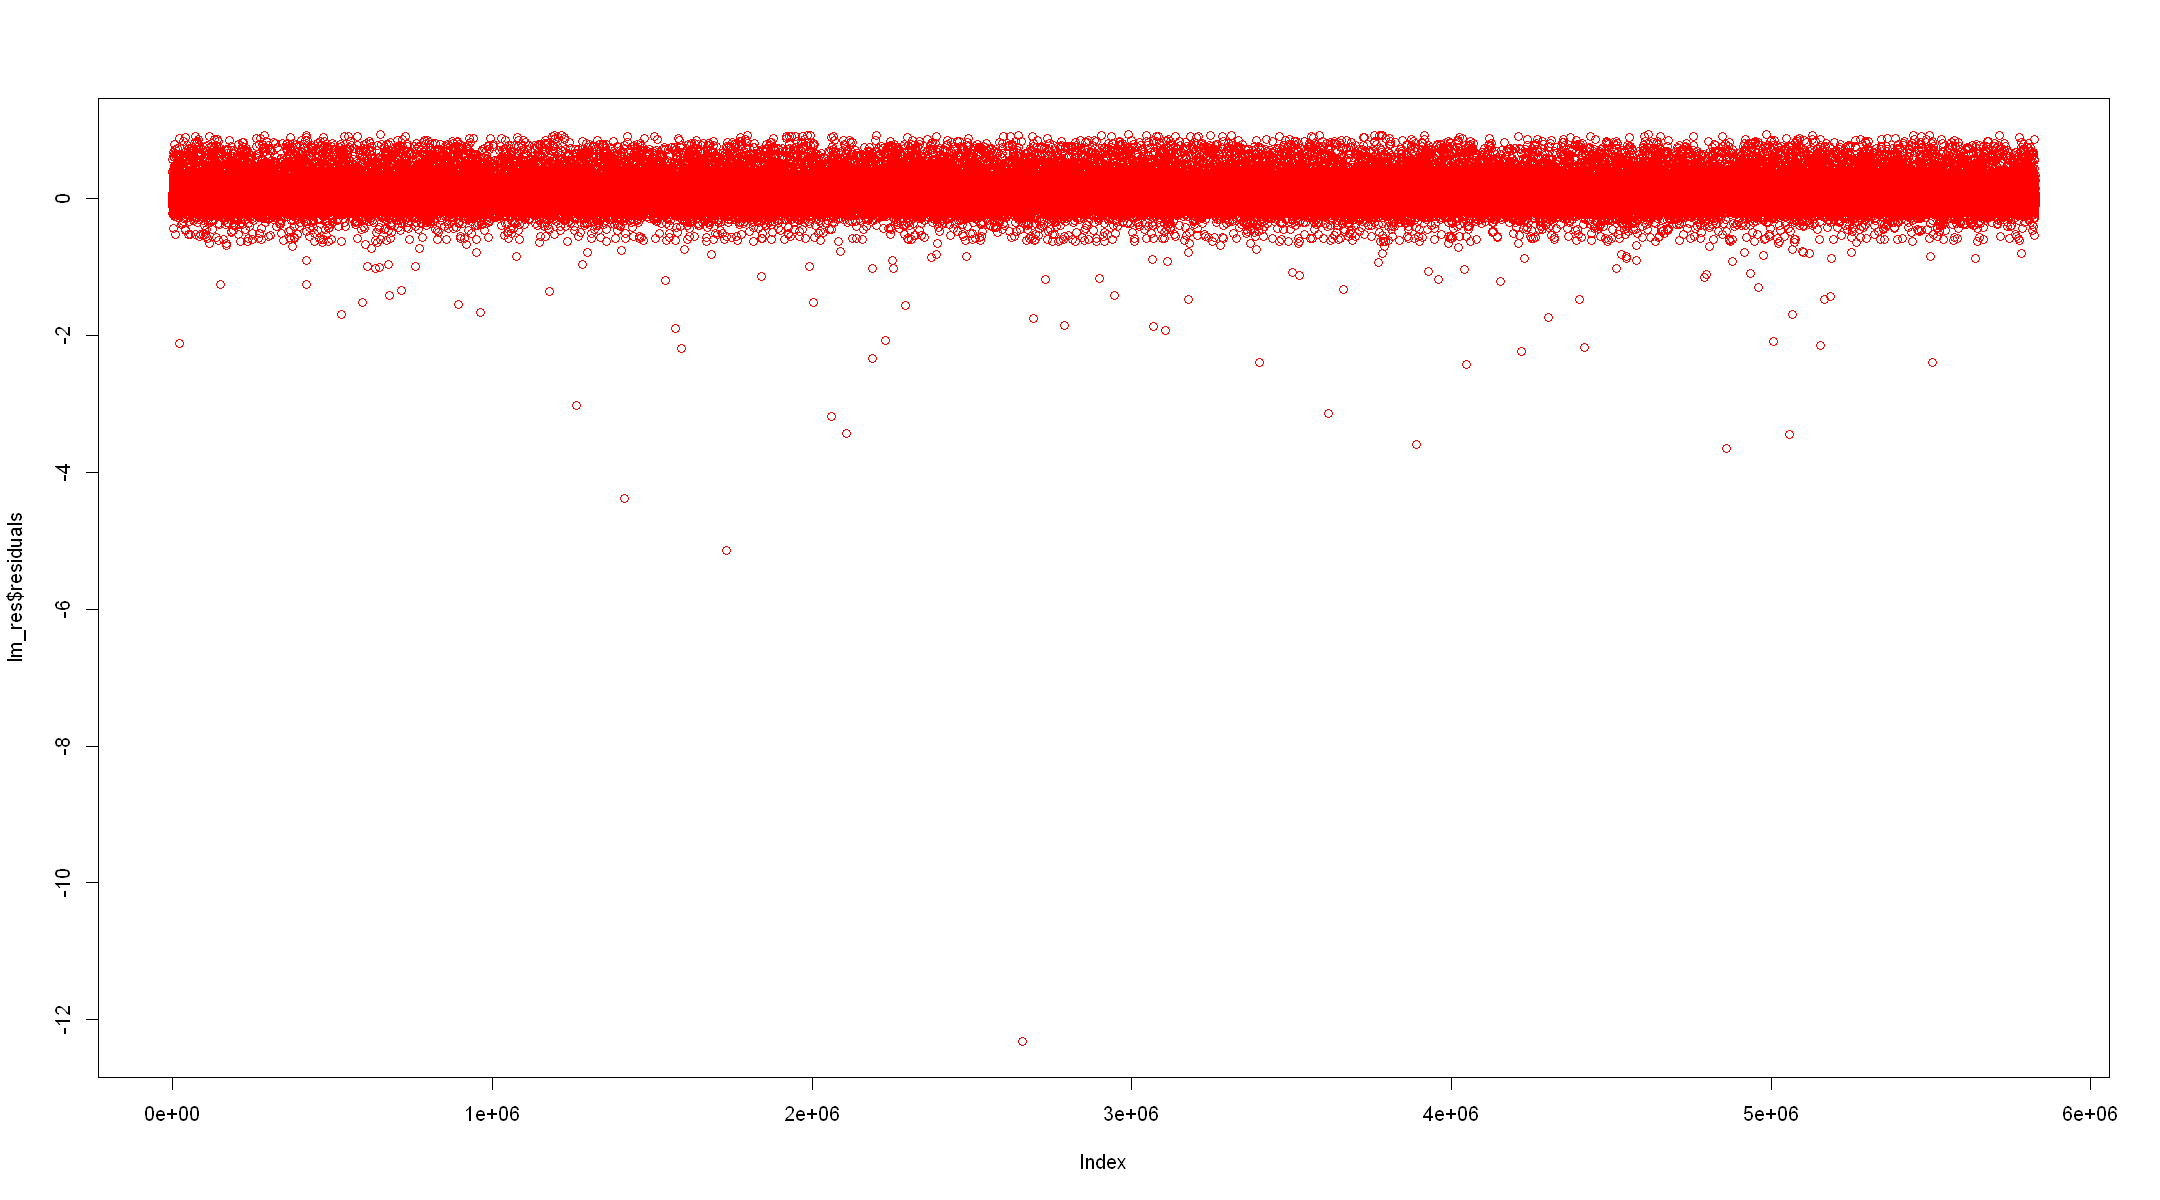

In [28]:
plot(lm_res$residuals, col = "red")

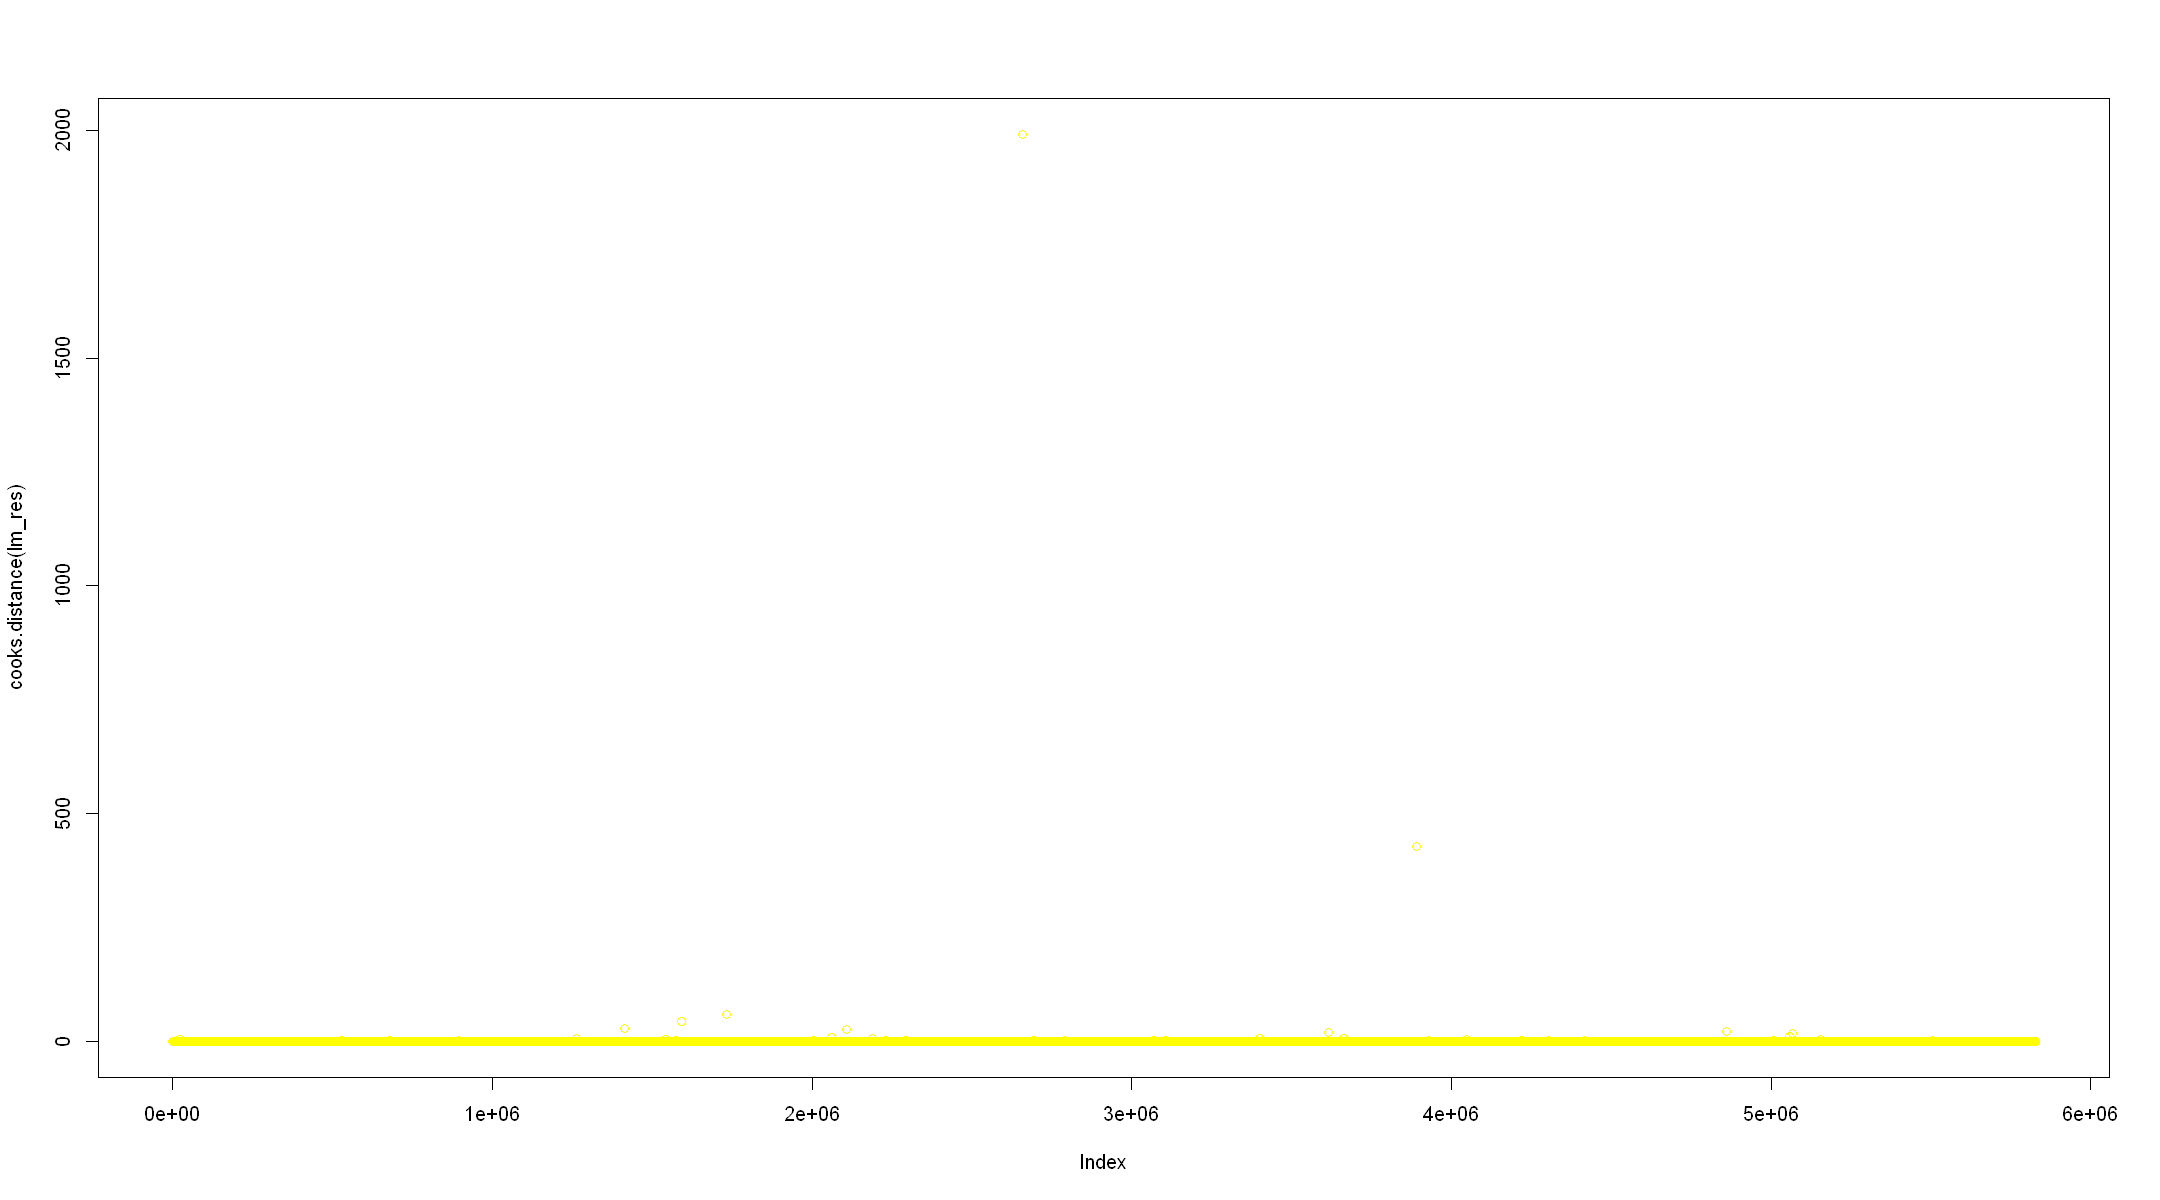

In [29]:
plot(cooks.distance(lm_res), col = "yellow")

Based on the results from our plots, we can tell there are no more outliers in our dataset, we can continue to create features using our base dataset.

In [30]:
first_predict<-predict(lm_res,valid_dataset)
head(first_predict)

1            2            3            4            5            6 
-0.004090496 -0.003788516  0.038381906  0.019090952  0.014474841  0.092402735

In [31]:
cat('- Residuals using our training dataset:\n')
# Residual = square(Observed - Predicted)
mean((training_dataset[,'item_cnt_month']-predict(lm_res, training_dataset))^2)

- Residuals using our training dataset:


[1] 0.0009903339

In [32]:
cat('- Residuals using our validating dataset:\n')
mean((valid_dataset[,'item_cnt_month']-predict(lm_res, valid_dataset))^2)

- Residuals using our validating dataset:


[1] 0.001798277

Both our residuals are close to 0, the model seems to be an ok fit despite the R-squared value we got, we will now use it to predict our testing data.

In [33]:
first_predict_final<-predict(lm_res,test_dataset)
first_predict_final

7282801     7282802     7282803     7282804     7282805     7282806 
-0.01316829 -0.01252739 -0.01316465 -0.01309404 -0.01314634 -0.01309763 
    7282807     7282808     7282809     7282810     7282811     7282812 
-0.01315056 -0.01253249 -0.01252741 -0.01315127 -0.01297837 -0.01315425 
    7282813     7282814     7282815     7282816     7282817     7282818 
-0.01254067 -0.01311845 -0.01310078 -0.01317137 -0.01223554 -0.01253935 
    7282819     7282820     7282821     7282822     7282823     7282824 
-0.01297677 -0.01315200 -0.01253862 -0.01316895 -0.01287116 -0.01315383 
    7282825     7282826     7282827     7282828     7282829     7282830 
-0.01295801 -0.01313444 -0.01308145 -0.01345717 -0.01343926 -0.01343892 
    7282831     7282832     7282833     7282834     7282835     7282836 
-0.01343909 -0.01343905 -0.01343903 -0.01343898 -0.01343933 -0.01343887 
    7282837     7282838     7282839     7282840     7282841     7282842 
-0.01343894 -0.01343900 -0.01234106 -0.01234113 -0.01234115 -0.01287121 
    7282843     7282844     7282845     7282846     7282847     7282848 
-0.01287120 -0.01287118 -0.01234145 -0.01234141 -0.01234139 -0.01234137 
    7282849     7282850     7282851     7282852     7282853     7282854 
-0.01234135 -0.01234120 -0.01234119 -0.01234117 -0.01252481 -0.01234134 
    7282855     7282856     7282857     7282858     7282859     7282860 
-0.01299839 -0.01297999 -0.01319987 -0.01312920 -0.01319970 -0.01318203 
    7282861     7282862     7282863     7282864     7282865     7282866 
-0.01312904 -0.01312881 -0.01319942 -0.01300200 -0.01300198 -0.01255995 
    7282867     7282868     7282869     7282870     7282871     7282872 
-0.01312301 -0.01312299 -0.01310531 -0.01319345 -0.01255934 -0.01311136 
    7282873     7282874     7282875     7282876     7282877     7282878 
-0.01316469 -0.01300583 -0.01303973 -0.01318096 -0.01251544 -0.01300446 
    7282879     7282880     7282881     7282882     7282883     7282884 
-0.01312772 -0.01312736 -0.01300375 -0.01319795 -0.01318028 -0.01310930 
    7282885     7282886     7282887     7282888     7282889     7282890 
-0.01311243 -0.01311236 -0.01311234 -0.01254998 -0.01298684 -0.01298673 
    7282891     7282892     7282893     7282894     7282895     7282896 
-0.01311018 -0.01318077 -0.01298621 -0.01310973 -0.01316103 -0.01254374 
    7282897     7282898     7282899     7282900     7282901     7282902 
-0.01309256 -0.01311251 -0.01313029 -0.01319259 -0.01317491 -0.01317449 
    7282903     7282904     7282905     7282906     7282907     7282908 
-0.01312005 -0.01310235 -0.01311995 -0.01255511 -0.01255387 -0.01317128 
    7282909     7282910     7282911     7282912     7282913     7282914 
-0.01255258 -0.01255226 -0.01316898 -0.01311599 -0.01318659 -0.01316892 
    7282915     7282916     7282917     7282918     7282919     7282920 
-0.01318336 -0.01307859 -0.01273626 -0.01251470 -0.01218743 -0.01218633 
    7282921     7282922     7282923     7282924     7282925     7282926 
-0.01218669 -0.01218665 -0.01218663 -0.01218650 -0.01218646 -0.01218643 
    7282927     7282928     7282929     7282930     7282931     7282932 
-0.01218676 -0.01272308 -0.01245816 -0.01277363 -0.01215000 -0.01271450 
    7282933     7282934     7282935     7282936     7282937     7282938 
-0.01291327 -0.01291325 -0.01218637 -0.01269687 -0.01269685 -0.01269683 
    7282939     7282940     7282941     7282942     7282943     7282944 
-0.01269680 -0.01269678 -0.01273019 -0.01273010 -0.01246466 -0.01272947 
    7282945     7282946     7282947     7282948     7282949     7282950 
-0.01228564 -0.01228562 -0.01228560 -0.01246123 -0.01246093 -0.01220654 
    7282951     7282952     7282953     7282954     7282955     7282956 
-0.01270606 -0.01272934 -0.01305449 -0.01275178 -0.01268091 -0.01269806 
    7282957     7282958     7282959     7282960     7282961     7282962 
-0.01275098 -0.01275092 -0.01275019 -0.01269713 -0.01269680 -0.01275194 
    7282963     7282964     7282965     7282966     7282967   

In [34]:
cat('- Residuals using our testing dataset:\n')
mean((test_dataset[,'item_cnt_month']-first_predict_final)^2)

- Residuals using our testing dataset:


[1] 0.0001574163

In [35]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = first_predict_final)
head(results)

ID item_cnt_month
7282801 0  -0.01316829   
7282802 1  -0.01252739   
7282803 2  -0.01316465   
7282804 3  -0.01309404   
7282805 4  -0.01314634   
7282806 5  -0.01309763

In [36]:
write.csv(results,file="results/final_results/data_.csv",row.names = FALSE)
rm(list=c('lm_res','first_predict_final','results'))

Our initial result:
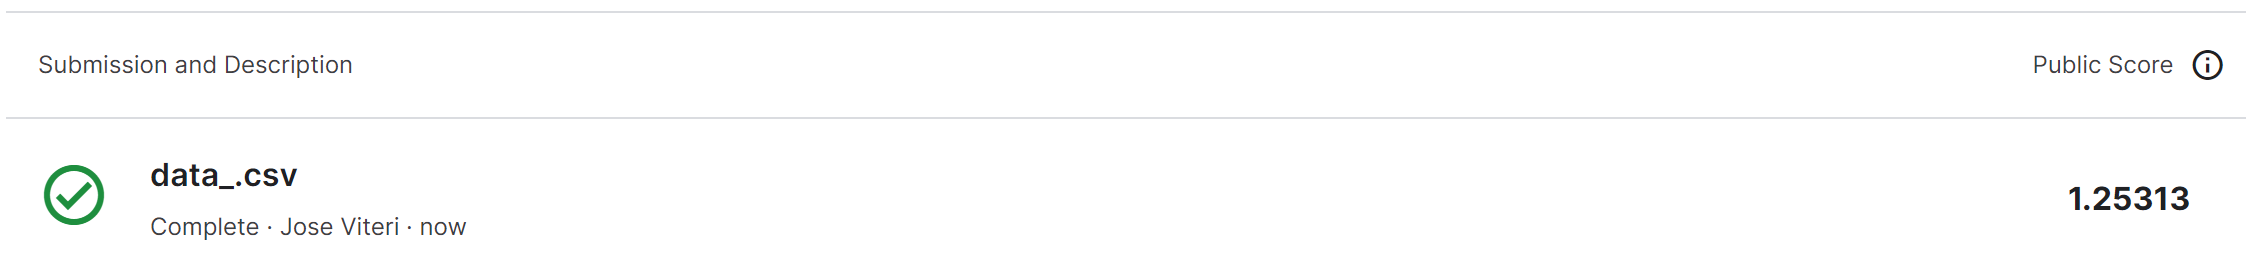

Our score isn't great but this is a start, we now have a good understanding of the data and the model, we will start improving results.

<p style="background-color:rgb(20,21,24);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">- Steps taken to improve our score and model results:</p>

<p style="background-color:rgb(120,200,124);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">2. Generalized linear regression model - feature engineering - all features included</p>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">We will now start creating new features that could improve our model results</p>

In [37]:
# Using the train_monthly dataset to create the new dataset
train_monthly_sub2 <- train_monthly
temp<- train_monthly[,c("date_block_num", "shop_id","item_id","item_cnt_month","revenue_month","mean_item_cnt","mean_item_price","date_block_shop_mean","date_block_item_mean")]
for (i in 1:3){
    shifted<-temp
    # Using the lag function to shift our data around and create new features to test on our model
    names(shifted) <-c("date_block_num", "shop_id", "item_id", sprintf("item_cnt_month_lag_%d",i),sprintf("revenue_month_lag_%d",i),sprintf("mean_item_cnt_lag_%d",i),sprintf("mean_item_price_lag_%d",i),sprintf("date_block_shop_mean_lag_%d",i),sprintf("date_block_item_mean_lag_%d",i))
    shifted[,"date_block_num"]<-shifted[,"date_block_num"]+i
    train_monthly_sub2<-train_monthly_sub2%>%left_join(shifted,by=c('date_block_num','shop_id','item_id'))
}
train_monthly_sub2[is.na(train_monthly_sub2)]<-0
head(train_monthly_sub2)
summary(train_monthly_sub2)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean ⋯
1 0               0             0     0.00000000           ⋯
2 0               0             1     0.03666667           ⋯
3 0               0             2     0.07098039           ⋯
4 0               0             3     0.04941176           ⋯
5 0               0             4     0.05823529           ⋯
6 0               0             5     0.06686275           ⋯
  mean_item_cnt_lag_2 mean_item_price_lag_2 date_block_shop_mean_lag_2
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.03666667                
5 0                   0                     0.07098039                
6 0                   0                     0.04941176                
  date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
1 0                          0                    0                  
2 0                          0                    0                  
3 0                          0                    0                  
4 0                          0                    0                  
5 0                          0                    0                  
6 0                          0                    0                  
  mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.00000000                
5 0                   0                     0.03666667                
6 0                   0                     0.07098039                
  date_block_item_mean_lag_3
1 0                         
2 0                         
3 0                         
4 0                         
5 0                         
6 0

 date_block_num    shop_id      item_category_id    item_id     
 Min.   : 0     Min.   : 2.00   Min.   : 0.00    Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.:37.00    1st Qu.: 5382  
 Median :17     Median :34.50   Median :43.00    Median :11203  
 Mean   :17     Mean   :31.64   Mean   :46.31    Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:58.00    3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :83.00    Max.   :22167  
 item_cnt_month    mean_item_cnt      mean_item_price    revenue_month    
 Min.   : 0.0000   Min.   :  0.0000   Min.   :    0.00   Min.   :      0  
 1st Qu.: 0.0000   1st Qu.:  0.0000   1st Qu.:    0.00   1st Qu.:      0  
 Median : 0.0000   Median :  0.0000   Median :    0.00   Median :      0  
 Mean   : 0.1837   Mean   :  0.0879   Mean   :   73.12   Mean   :    230  
 3rd Qu.: 0.0000   3rd Qu.:  0.0000   3rd Qu.:    0.00   3rd Qu.:      0  
 Max.   :20.0000   Max.   :500.0000   Max.   :42990.00   Max.   :6264230  
     month        da

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Normalizing our data</p>

In [38]:
minMax <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
y_min<-min(train_monthly_sub2$item_cnt_month)
y_max<-max(train_monthly_sub2$item_cnt_month)
train_monthly_sub2[,5:29]<-apply(train_monthly_sub2[,5:29],2,minMax)

In [39]:
#Verifying the normalization of our data
head(train_monthly_sub2)
cat('\n\n----------------------------------------------------------------------------------------')
summary(train_monthly_sub2)
cat('\n- We now see that our max values are 1 for all our features, in comparison to our previous summary that had values greater than 1.')

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month      date_block_shop_mean ⋯
1 0               0             0.00000000 0.00000000           ⋯
2 0               0             0.09090909 0.02315503           ⋯
3 0               0             0.18181818 0.04482417           ⋯
4 0               0             0.27272727 0.03120357           ⋯
5 0               0             0.36363636 0.03677563           ⋯
6 0               0             0.45454545 0.04222387           ⋯
  mean_item_cnt_lag_2 mean_item_price_lag_2 date_block_shop_mean_lag_2
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.02315503                
5 0                   0                     0.04482417                
6 0                   0                     0.03120357                
  date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
1 0                          0                    0                  
2 0                          0                    0                  
3 0                          0                    0                  
4 0                          0                    0                  
5 0                          0                    0                  
6 0                          0                    0                  
  mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.00000000                
5 0                   0                     0.02315503                
6 0                   0                     0.04482417                
  date_block_item_mean_lag_3
1 0                         
2 0                         
3 0                         
4 0                         
5 0                         
6 0



----------------------------------------------------------------------------------------

 date_block_num    shop_id      item_category_id    item_id     
 Min.   : 0     Min.   : 2.00   Min.   : 0.00    Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.:37.00    1st Qu.: 5382  
 Median :17     Median :34.50   Median :43.00    Median :11203  
 Mean   :17     Mean   :31.64   Mean   :46.31    Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:58.00    3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :83.00    Max.   :22167  
 item_cnt_month     mean_item_cnt       mean_item_price    revenue_month     
 Min.   :0.000000   Min.   :0.0000000   Min.   :0.000000   Min.   :0.00e+00  
 1st Qu.:0.000000   1st Qu.:0.0000000   1st Qu.:0.000000   1st Qu.:0.00e+00  
 Median :0.000000   Median :0.0000000   Median :0.000000   Median :0.00e+00  
 Mean   :0.009182   Mean   :0.0001757   Mean   :0.001701   Mean   :3.68e-05  
 3rd Qu.:0.000000   3rd Qu.:0.0000000   3rd Qu.:0.000000   3rd Qu.:0.00e+00  
 Max.   :1.000000   Max.   :1.0000000   Max.   :1.000000   Max.   :1.00e+00  


- We now see that our max values are 1 for all our features, in comparison to our previous summary that had values greater than 1.

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Separating my testing, valid and training data</p>

In [40]:
test_dataset2 <- train_monthly_sub2[which(train_monthly_sub2$date_block_num == 34),]
head(test_dataset2)

date_block_num shop_id item_category_id item_id item_cnt_month
7282801 34             5       19               5037    0             
7282802 34             5       55               5320    0             
7282803 34             5       19               5233    0             
7282804 34             5       23               5232    0             
7282805 34             5       20               5268    0             
7282806 34             5       23               5039    0             
        mean_item_cnt mean_item_price revenue_month month    
7282801 0             0               0             0.9090909
7282802 0             0               0             0.9090909
7282803 0             0               0             0.9090909
7282804 0             0               0             0.9090909
7282805 0             0               0             0.9090909
7282806 0             0               0             0.9090909
        date_block_shop_mean ⋯ mean_item_cnt_lag_2 mean_item_price_lag_2
7282801 0                    ⋯ 0.002               0.02237981           
7282802 0                    ⋯ 0.000               0.00000000           
7282803 0                    ⋯ 0.002               0.02982980           
7282804 0                    ⋯ 0.000               0.00000000           
7282805 0                    ⋯ 0.000               0.00000000           
7282806 0                    ⋯ 0.002               0.02237981           
        date_block_shop_mean_lag_2 date_block_item_mean_lag_2
7282801 0.1239475                  0.13500                   
7282802 0.1239475                  0.00000                   
7282803 0.1239475                  0.10000                   
7282804 0.1239475                  0.06000                   
7282805 0.1239475                  0.00000                   
7282806 0.1239475                  0.11625                   
        item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
7282801 0.15                 4.785105e-04        0.002              
7282802 0.00                 0.000000e+00        0.000              
7282803 0.05                 9.562229e-05        0.002              
7282804 0.05                 9.562229e-05        0.002              
7282805 0.00                 0.000000e+00        0.000              
7282806 0.00                 0.000000e+00        0.000              
        mean_item_price_lag_3 date_block_shop_mean_lag_3
7282801 0.02983478            0.1459881                 
7282802 0.00000000            0.1459881                 
7282803 0.01788594            0.1459881                 
7282804 0.01788594            0.1459881                 
7282805 0.00000000            0.1459881                 
7282806 0.00000000            0.1459881                 
        date_block_item_mean_lag_3
7282801 0.14625                   
7282802 0.00000                   
7282803 0.18625                   
7282804 0.08000                   
7282805 0.00000                   
7282806 0.13250

In [41]:
train_monthly_sub2 <- train_monthly_sub2[which(train_monthly_sub2$date_block_num != 34),]
tail(train_monthly_sub2)

date_block_num shop_id item_category_id item_id item_cnt_month
7282795 28             45      37               969     0             
7282796 29             45      37               969     0             
7282797 30             45      37               969     0             
7282798 31             45      37               969     0             
7282799 32             45      37               969     0             
7282800 33             45      37               969     0             
        mean_item_cnt mean_item_price revenue_month month    
7282795 0             0               0             0.3636364
7282796 0             0               0             0.4545455
7282797 0             0               0             0.5454545
7282798 0             0               0             0.6363636
7282799 0             0               0             0.7272727
7282800 0             0               0             0.8181818
        date_block_shop_mean ⋯ mean_item_cnt_lag_2 mean_item_price_lag_2
7282795 0.07491332           ⋯ 0                   0                    
7282796 0.06636949           ⋯ 0                   0                    
7282797 0.06996038           ⋯ 0                   0                    
7282798 0.08098068           ⋯ 0                   0                    
7282799 0.07763744           ⋯ 0                   0                    
7282800 0.08259039           ⋯ 0                   0                    
        date_block_shop_mean_lag_2 date_block_item_mean_lag_2
7282795 0.06971273                 0.01000                   
7282796 0.07367509                 0.00250                   
7282797 0.07491332                 0.00250                   
7282798 0.06636949                 0.00125                   
7282799 0.06996038                 0.00250                   
7282800 0.08098068                 0.00125                   
        item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
7282795 0                    0                   0                  
7282796 0                    0                   0                  
7282797 0                    0                   0                  
7282798 0                    0                   0                  
7282799 0                    0                   0                  
7282800 0                    0                   0                  
        mean_item_price_lag_3 date_block_shop_mean_lag_3
7282795 0                     0.07478950                
7282796 0                     0.06971273                
7282797 0                     0.07367509                
7282798 0                     0.07491332                
7282799 0                     0.06636949                
7282800 0                     0.06996038                
        date_block_item_mean_lag_3
7282795 0.00625                   
7282796 0.01000                   
7282797 0.00250                   
7282798 0.00250                   
7282799 0.00125                   
7282800 0.00250

In [42]:
# Using dlpyr sample_frac() function, we are separating the dataset randomly, using 80% for training and 20% for validating
set.seed(42)
training_dataset2  <- train_monthly_sub2 %>% dplyr::sample_frac(0.8)
cat('\n -------------------------------------- TRAINING DATASET --------------------------------------')
head (training_dataset2)
# print ("Testing Dataset")
valid_dataset2   <- dplyr::anti_join(train_monthly_sub2,training_dataset2)
cat('\n -------------------------------------- VALIDATING DATASET --------------------------------------')
head (valid_dataset2)


 -------------------------------------- TRAINING DATASET --------------------------------------

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 22             46      37               20224   0              0            
2 20             22      19                2049   0              0            
3  7              6      64               16095   0              0            
4 19             15      47               13294   0              0            
5 15             26      61               18107   0              0            
6 15              2      70               13742   0              0            
  mean_item_price revenue_month month     date_block_shop_mean ⋯
1 0               0             0.9090909 0.18325904           ⋯
2 0               0             0.7272727 0.11045072           ⋯
3 0               0             0.6363636 0.11986132           ⋯
4 0               0             0.6363636 0.15292224           ⋯
5 0               0             0.2727273 0.07639921           ⋯
6 0               0             0.2727273 0.04928182           ⋯
  mean_item_cnt_lag_2 mean_item_price_lag_2 date_block_shop_mean_lag_2
1 0                   0                     0.13199604                
2 0                   0                     0.07875186                
3 0                   0                     0.09868747                
4 0                   0                     0.11627043                
5 0                   0                     0.10896483                
6 0                   0                     0.05435859                
  date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
1 0.00125                    0                    0                  
2 0.00375                    0                    0                  
3 0.00000                    0                    0                  
4 0.00000                    0                    0                  
5 0.00000                    0                    0                  
6 0.00000                    0                    0                  
  mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
1 0                   0                     0.18784052                
2 0                   0                     0.08717187                
3 0                   0                     0.08135215                
4 0                   0                     0.10698366                
5 0                   0                     0.09039128                
6 0                   0                     0.05151065                
  date_block_item_mean_lag_3
1 0.00250                   
2 0.01125                   
3 0.00000                   
4 0.00000                   
5 0.00000                   
6 0.00000

Joining, by = c("date_block_num", "shop_id", "item_category_id", "item_id", "item_cnt_month", "mean_item_cnt",
"mean_item_price", "revenue_month", "month", "date_block_shop_mean", "date_block_item_mean", "item_cnt_month_lag_1",
"revenue_month_lag_1", "mean_item_cnt_lag_1", "mean_item_price_lag_1", "date_block_shop_mean_lag_1",
"date_block_item_mean_lag_1", "item_cnt_month_lag_2", "revenue_month_lag_2", "mean_item_cnt_lag_2",
"mean_item_price_lag_2", "date_block_shop_mean_lag_2", "date_block_item_mean_lag_2", "item_cnt_month_lag_3",
"revenue_month_lag_3", "mean_item_cnt_lag_3", "mean_item_price_lag_3", "date_block_shop_mean_lag_3",
"date_block_item_mean_lag_3")



 -------------------------------------- VALIDATING DATASET --------------------------------------

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 10             5       19               5037    0.00           0.000        
2 13             5       19               5037    0.00           0.000        
3 21             5       19               5037    0.00           0.000        
4 26             5       19               5037    0.00           0.000        
5 27             5       19               5037    0.00           0.000        
6 30             5       19               5037    0.05           0.002        
  mean_item_price revenue_month month      date_block_shop_mean ⋯
1 0.00000000      0.0000000000  0.90909091 0.06513125           ⋯
2 0.00000000      0.0000000000  0.09090909 0.06835067           ⋯
3 0.00000000      0.0000000000  0.81818182 0.09361070           ⋯
4 0.00000000      0.0000000000  0.18181818 0.10747895           ⋯
5 0.00000000      0.0000000000  0.27272727 0.08828628           ⋯
6 0.03486857      0.0002392952  0.54545455 0.10475483           ⋯
  mean_item_cnt_lag_2 mean_item_price_lag_2 date_block_shop_mean_lag_2
1 0.000               0.00000000            0.05076771                
2 0.000               0.00000000            0.10264983                
3 0.000               0.00000000            0.11243190                
4 0.002               0.05968946            0.11924220                
5 0.000               0.00000000            0.09992571                
6 0.002               0.03878770            0.10314512                
  date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
1 0.00000                    0.0                  0.0000000000       
2 0.00000                    0.0                  0.0000000000       
3 0.00000                    0.0                  0.0000000000       
4 0.10875                    0.1                  0.0006382269       
5 0.04000                    0.1                  0.0006382269       
6 0.10250                    0.0                  0.0000000000       
  mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
1 0.000               0.00000000            0.05336800                
2 0.000               0.00000000            0.06513125                
3 0.000               0.00000000            0.09534423                
4 0.002               0.05968946            0.17644874                
5 0.002               0.05968946            0.11924220                
6 0.000               0.00000000            0.08828628                
  date_block_item_mean_lag_3
1 0.00000                   
2 0.00000                   
3 0.00000                   
4 0.25000                   
5 0.10875                   
6 0.03125

In [43]:
tic()
glm_res<-glm(item_cnt_month~.,data=training_dataset2)
summary(glm_res)
toc()
cat('\n-------------------------------- Result exploration --------------------------------')


Call:
glm(formula = item_cnt_month ~ ., data = training_dataset2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.8906  -0.0008   0.0010   0.0020   3.0948  

Coefficients:
                             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                -1.278e-03  4.670e-05  -27.354  < 2e-16 ***
date_block_num             -6.870e-05  1.321e-06  -52.016  < 2e-16 ***
shop_id                     2.584e-07  6.251e-07    0.413   0.6794    
item_category_id            5.025e-06  6.866e-07    7.318 2.52e-13 ***
item_id                     3.270e-09  1.824e-09    1.793   0.0731 .  
mean_item_cnt               2.128e+01  1.928e-02 1103.382  < 2e-16 ***
mean_item_price             1.890e-01  1.272e-03  148.567  < 2e-16 ***
revenue_month               2.299e+00  1.429e-02  160.918  < 2e-16 ***
month                      -1.532e-03  4.124e-05  -37.160  < 2e-16 ***
date_block_shop_mean        3.543e-02  3.140e-04  112.836  < 2e-16 ***
date_block_item_mean   

36.11 sec elapsed

-------------------------------- Result exploration --------------------------------

* p-value : 
There are a couple of features that have a p-value higher than 0.05 which we will eliminate to view if our model in fact improves. These are: 
** shop_id
** item_id

* residuals : 
Our residuals for this model seem very similar to our first

In [44]:
cat('- Residuals using our training dataset:\n')
mean((training_dataset2[,'item_cnt_month']-predict(glm_res, training_dataset2))^2)

- Residuals using our training dataset:


[1] 0.0007013456

In [45]:
cat('- Residuals using our validating dataset:\n')
mean((valid_dataset2[,'item_cnt_month']-predict(glm_res, valid_dataset2))^2)

- Residuals using our validating dataset:


[1] 0.001255511

The residuals for this model are closer to 0 when comparing it to our previous model, this could be a sign of improvement. We will need to verify this by scoring it in kaggle.

In [46]:
second_predict_final<-predict(glm_res,test_dataset2)
cat('- Residuals using our testing dataset:\n')
mean((test_dataset2[,'item_cnt_month']-second_predict_final)^2)

- Residuals using our testing dataset:


[1] 0.0005126685

In [47]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = second_predict_final)
head(results)
write.csv(results,file="results/final_results/data_1.csv",row.names = FALSE)
rm(list=c('glm_res','second_predict_final','results'))

ID item_cnt_month
7282801 0  -0.033812359  
7282802 1  -0.007395812  
7282803 2  -0.030194227  
7282804 3  -0.031767251  
7282805 4  -0.007571843  
7282806 5  -0.040288224

Second result:

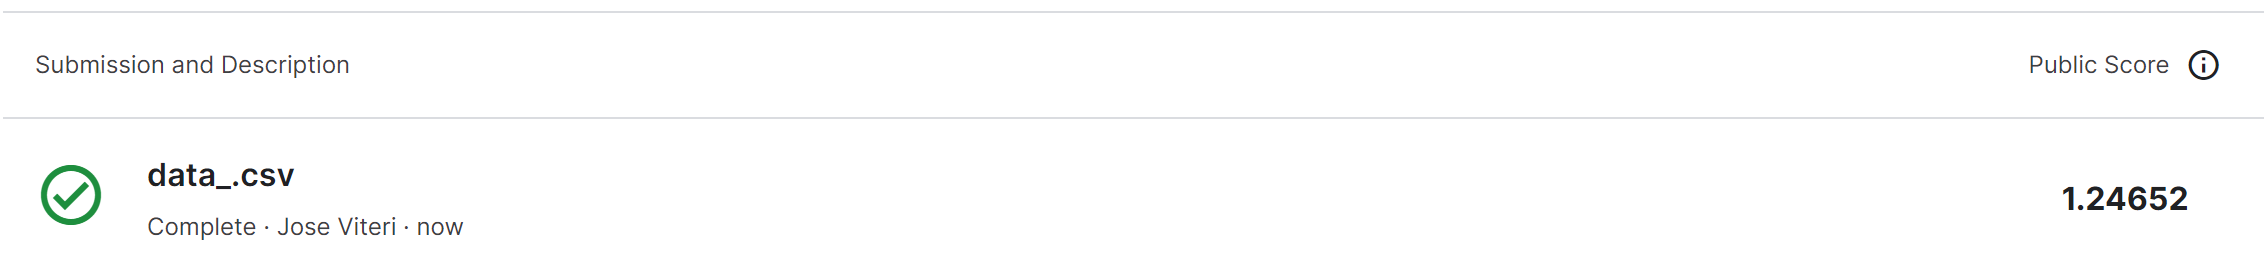

We have made a small improvement in our result.

<p style="background-color:rgb(120,200,124);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">3. Generalized linear regression model - feature engineering - removing some features</p>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Removing the features that have a poor p-value</p>

In [48]:
drop <- c('shop_id','item_id')
test_dataset3 <- test_dataset2[,!(names(test_dataset2) %in% drop)]
head(test_dataset3)

date_block_num item_category_id item_cnt_month mean_item_cnt
7282801 34             19               0              0            
7282802 34             55               0              0            
7282803 34             19               0              0            
7282804 34             23               0              0            
7282805 34             20               0              0            
7282806 34             23               0              0            
        mean_item_price revenue_month month     date_block_shop_mean
7282801 0               0             0.9090909 0                   
7282802 0               0             0.9090909 0                   
7282803 0               0             0.9090909 0                   
7282804 0               0             0.9090909 0                   
7282805 0               0             0.9090909 0                   
7282806 0               0             0.9090909 0                   
        date_block_item_mean item_cnt_month_lag_1 ⋯ mean_item_cnt_lag_2
7282801 0                    0.00                 ⋯ 0.002              
7282802 0                    0.00                 ⋯ 0.000              
7282803 0                    0.05                 ⋯ 0.002              
7282804 0                    0.00                 ⋯ 0.000              
7282805 0                    0.00                 ⋯ 0.000              
7282806 0                    0.05                 ⋯ 0.002              
        mean_item_price_lag_2 date_block_shop_mean_lag_2
7282801 0.02237981            0.1239475                 
7282802 0.00000000            0.1239475                 
7282803 0.02982980            0.1239475                 
7282804 0.00000000            0.1239475                 
7282805 0.00000000            0.1239475                 
7282806 0.02237981            0.1239475                 
        date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
7282801 0.13500                    0.15                 4.785105e-04       
7282802 0.00000                    0.00                 0.000000e+00       
7282803 0.10000                    0.05                 9.562229e-05       
7282804 0.06000                    0.05                 9.562229e-05       
7282805 0.00000                    0.00                 0.000000e+00       
7282806 0.11625                    0.00                 0.000000e+00       
        mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
7282801 0.002               0.02983478            0.1459881                 
7282802 0.000               0.00000000            0.1459881                 
7282803 0.002               0.01788594            0.1459881                 
7282804 0.002               0.01788594            0.1459881                 
7282805 0.000               0.00000000            0.1459881                 
7282806 0.000               0.00000000            0.1459881                 
        date_block_item_mean_lag_3
7282801 0.14625                   
7282802 0.00000                   
7282803 0.18625                   
7282804 0.08000                   
7282805 0.00000                   
7282806 0.13250

In [49]:
train_monthly_sub3 <- train_monthly_sub2[which(train_monthly_sub2$date_block_num != 34),]
train_monthly_sub3 <- train_monthly_sub3[,!(names(train_monthly_sub3) %in% drop)]
tail(train_monthly_sub3)

date_block_num item_category_id item_cnt_month mean_item_cnt
7282795 28             37               0              0            
7282796 29             37               0              0            
7282797 30             37               0              0            
7282798 31             37               0              0            
7282799 32             37               0              0            
7282800 33             37               0              0            
        mean_item_price revenue_month month     date_block_shop_mean
7282795 0               0             0.3636364 0.07491332          
7282796 0               0             0.4545455 0.06636949          
7282797 0               0             0.5454545 0.06996038          
7282798 0               0             0.6363636 0.08098068          
7282799 0               0             0.7272727 0.07763744          
7282800 0               0             0.8181818 0.08259039          
        date_block_item_mean item_cnt_month_lag_1 ⋯ mean_item_cnt_lag_2
7282795 0.00250              0                    ⋯ 0                  
7282796 0.00125              0                    ⋯ 0                  
7282797 0.00250              0                    ⋯ 0                  
7282798 0.00125              0                    ⋯ 0                  
7282799 0.00625              0                    ⋯ 0                  
7282800 0.00375              0                    ⋯ 0                  
        mean_item_price_lag_2 date_block_shop_mean_lag_2
7282795 0                     0.06971273                
7282796 0                     0.07367509                
7282797 0                     0.07491332                
7282798 0                     0.06636949                
7282799 0                     0.06996038                
7282800 0                     0.08098068                
        date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
7282795 0.01000                    0                    0                  
7282796 0.00250                    0                    0                  
7282797 0.00250                    0                    0                  
7282798 0.00125                    0                    0                  
7282799 0.00250                    0                    0                  
7282800 0.00125                    0                    0                  
        mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
7282795 0                   0                     0.07478950                
7282796 0                   0                     0.06971273                
7282797 0                   0                     0.07367509                
7282798 0                   0                     0.07491332                
7282799 0                   0                     0.06636949                
7282800 0                   0                     0.06996038                
        date_block_item_mean_lag_3
7282795 0.00625                   
7282796 0.01000                   
7282797 0.00250                   
7282798 0.00250                   
7282799 0.00125                   
7282800 0.00250

In [50]:
# Using the same training and valid dataset as the previous result, now removing the features that have a high p-value
training_dataset3  <- training_dataset2[,!(names(training_dataset2) %in% drop)]
cat('\n -------------------------------------- TRAINING DATASET --------------------------------------')
head (training_dataset3)
valid_dataset3   <- valid_dataset2[,!(names(valid_dataset2) %in% drop)]
cat('\n -------------------------------------- VALIDATING DATASET --------------------------------------')
head (valid_dataset3)


 -------------------------------------- TRAINING DATASET --------------------------------------

date_block_num item_category_id item_cnt_month mean_item_cnt mean_item_price
1 22             37               0              0             0              
2 20             19               0              0             0              
3  7             64               0              0             0              
4 19             47               0              0             0              
5 15             61               0              0             0              
6 15             70               0              0             0              
  revenue_month month     date_block_shop_mean date_block_item_mean
1 0             0.9090909 0.18325904           0.00375             
2 0             0.7272727 0.11045072           0.00000             
3 0             0.6363636 0.11986132           0.00000             
4 0             0.6363636 0.15292224           0.00000             
5 0             0.2727273 0.07639921           0.00000             
6 0             0.2727273 0.04928182           0.00000             
  item_cnt_month_lag_1 ⋯ mean_item_cnt_lag_2 mean_item_price_lag_2
1 0                    ⋯ 0                   0                    
2 0                    ⋯ 0                   0                    
3 0                    ⋯ 0                   0                    
4 0                    ⋯ 0                   0                    
5 0                    ⋯ 0                   0                    
6 0                    ⋯ 0                   0                    
  date_block_shop_mean_lag_2 date_block_item_mean_lag_2 item_cnt_month_lag_3
1 0.13199604                 0.00125                    0                   
2 0.07875186                 0.00375                    0                   
3 0.09868747                 0.00000                    0                   
4 0.11627043                 0.00000                    0                   
5 0.10896483                 0.00000                    0                   
6 0.05435859                 0.00000                    0                   
  revenue_month_lag_3 mean_item_cnt_lag_3 mean_item_price_lag_3
1 0                   0                   0                    
2 0                   0                   0                    
3 0                   0                   0                    
4 0                   0                   0                    
5 0                   0                   0                    
6 0                   0                   0                    
  date_block_shop_mean_lag_3 date_block_item_mean_lag_3
1 0.18784052                 0.00250                   
2 0.08717187                 0.01125                   
3 0.08135215                 0.00000                   
4 0.10698366                 0.00000                   
5 0.09039128                 0.00000                   
6 0.05151065                 0.00000


 -------------------------------------- VALIDATING DATASET --------------------------------------

date_block_num item_category_id item_cnt_month mean_item_cnt mean_item_price
1 10             19               0.00           0.000         0.00000000     
2 13             19               0.00           0.000         0.00000000     
3 21             19               0.00           0.000         0.00000000     
4 26             19               0.00           0.000         0.00000000     
5 27             19               0.00           0.000         0.00000000     
6 30             19               0.05           0.002         0.03486857     
  revenue_month month      date_block_shop_mean date_block_item_mean
1 0.0000000000  0.90909091 0.06513125           0.00000             
2 0.0000000000  0.09090909 0.06835067           0.00000             
3 0.0000000000  0.81818182 0.09361070           0.06500             
4 0.0000000000  0.18181818 0.10747895           0.03625             
5 0.0000000000  0.27272727 0.08828628           0.03125             
6 0.0002392952  0.54545455 0.10475483           0.06625             
  item_cnt_month_lag_1 ⋯ mean_item_cnt_lag_2 mean_item_price_lag_2
1 0.00                 ⋯ 0.000               0.00000000           
2 0.00                 ⋯ 0.000               0.00000000           
3 0.05                 ⋯ 0.000               0.00000000           
4 0.00                 ⋯ 0.002               0.05968946           
5 0.00                 ⋯ 0.000               0.00000000           
6 0.05                 ⋯ 0.002               0.03878770           
  date_block_shop_mean_lag_2 date_block_item_mean_lag_2 item_cnt_month_lag_3
1 0.05076771                 0.00000                    0.0                 
2 0.10264983                 0.00000                    0.0                 
3 0.11243190                 0.00000                    0.0                 
4 0.11924220                 0.10875                    0.1                 
5 0.09992571                 0.04000                    0.1                 
6 0.10314512                 0.10250                    0.0                 
  revenue_month_lag_3 mean_item_cnt_lag_3 mean_item_price_lag_3
1 0.0000000000        0.000               0.00000000           
2 0.0000000000        0.000               0.00000000           
3 0.0000000000        0.000               0.00000000           
4 0.0006382269        0.002               0.05968946           
5 0.0006382269        0.002               0.05968946           
6 0.0000000000        0.000               0.00000000           
  date_block_shop_mean_lag_3 date_block_item_mean_lag_3
1 0.05336800                 0.00000                   
2 0.06513125                 0.00000                   
3 0.09534423                 0.00000                   
4 0.17644874                 0.25000                   
5 0.11924220                 0.10875                   
6 0.08828628                 0.03125

In [51]:
tic()
glm_res2<-glm(item_cnt_month~.,data=training_dataset3)
summary(glm_res2)
toc()
cat('\n-------------------------------- Result exploration --------------------------------')


Call:
glm(formula = item_cnt_month ~ ., data = training_dataset3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.8905  -0.0008   0.0010   0.0020   3.0948  

Coefficients:
                             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                -1.248e-03  4.072e-05  -30.655  < 2e-16 ***
date_block_num             -6.870e-05  1.321e-06  -52.018  < 2e-16 ***
item_category_id            5.343e-06  6.631e-07    8.058 7.77e-16 ***
mean_item_cnt               2.128e+01  1.928e-02 1103.383  < 2e-16 ***
mean_item_price             1.890e-01  1.272e-03  148.557  < 2e-16 ***
revenue_month               2.299e+00  1.429e-02  160.920  < 2e-16 ***
month                      -1.532e-03  4.124e-05  -37.160  < 2e-16 ***
date_block_shop_mean        3.543e-02  3.140e-04  112.840  < 2e-16 ***
date_block_item_mean        7.186e-01  4.625e-04 1553.634  < 2e-16 ***
item_cnt_month_lag_1        3.709e-01  4.064e-04  912.497  < 2e-16 ***
revenue_month_lag_1    

33.74 sec elapsed

-------------------------------- Result exploration --------------------------------

* p-value : 
We now have all features with p-values less than .05

* residuals : 
Our residual went from a Min: -12 to a Min: -10

In [52]:
cat('- Residuals using our training dataset:\n')
# Residual = square(Observed - Predicted)
mean((training_dataset3[,'item_cnt_month']-predict(glm_res2, training_dataset3))^2)

- Residuals using our training dataset:


[1] 0.000701346

In [53]:
cat('- Residuals using our validating dataset:\n')
mean((valid_dataset3[,'item_cnt_month']-predict(glm_res2, valid_dataset3))^2)

- Residuals using our validating dataset:


[1] 0.00125551

Our residuals from our validation dataset seems to have made an improvement when we compare it to our previous residual of the same model where we used all the features for the prediction

In [54]:
third_predict_final<-predict(glm_res2,test_dataset3)
cat('- Residuals using our testing dataset:\n')
mean((test_dataset3[,'item_cnt_month']-third_predict_final)^2)

- Residuals using our testing dataset:


[1] 0.0005126738

In [55]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = third_predict_final)
head(results)
write.csv(results,file="results/final_results/data_2.csv",row.names = FALSE)
rm(list=c('glm_res2','third_predict_final','results'))

ID item_cnt_month
7282801 0  -0.033796787  
7282802 1  -0.007367166  
7282803 2  -0.030179980  
7282804 3  -0.031749916  
7282805 4  -0.007554187  
7282806 5  -0.040271346

Third result:

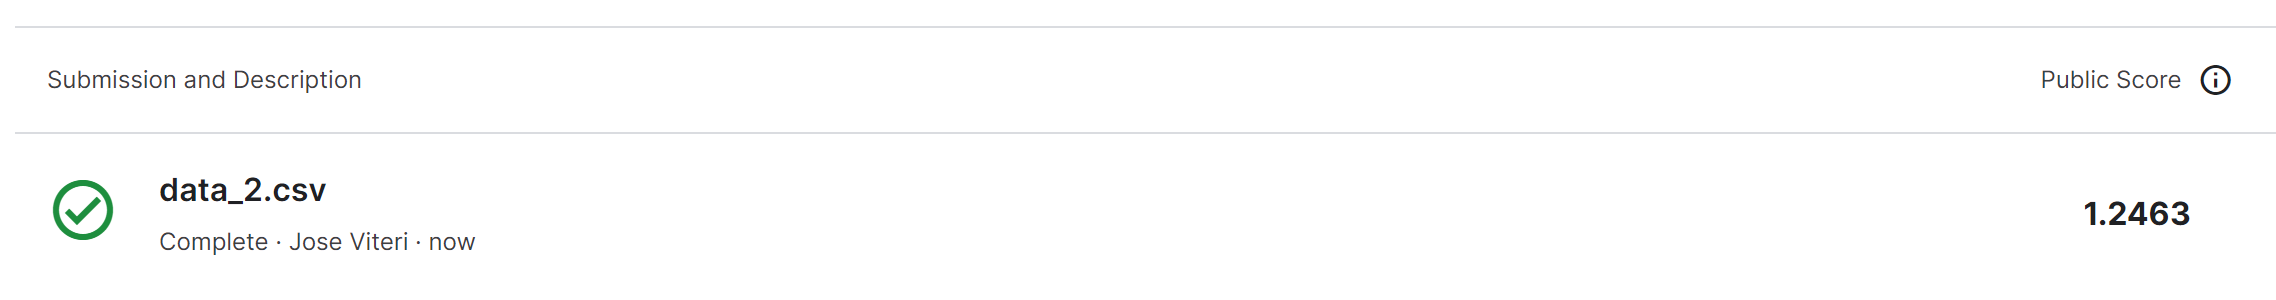

Removing the 4 features has made an improvemment in our score - we now have a a score of 1.2463, which is 0.00022 higher than our previous score.

<p style="background-color:rgb(120,200,124);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">4. Generalized linear regression model - feature engineering - removing some features using a correlation matrix</p>

Because we removed 2 features already, we now would like to see what the correlation is with the remaining features.

In [56]:
correlationMatrix <- cor(train_monthly_sub3)
correlationMatrix

date_block_num item_category_id item_cnt_month
date_block_num             1.00000000      0.000000e+00     0.05064294   
item_category_id           0.00000000      1.000000e+00    -0.06893110   
item_cnt_month             0.05064294     -6.893110e-02     1.00000000   
mean_item_cnt              0.07128763     -4.866800e-02     0.54964685   
mean_item_price            0.07506156     -9.956306e-02     0.35592043   
revenue_month              0.01369819     -4.104500e-02     0.34382900   
month                      0.22415456     -4.782083e-21     0.02319975   
date_block_shop_mean       0.33546112     -2.512519e-20     0.15096514   
date_block_item_mean       0.07096346     -9.658978e-02     0.71364802   
item_cnt_month_lag_1       0.05709986     -6.762705e-02     0.63195263   
revenue_month_lag_1        0.01475011     -3.956360e-02     0.21955096   
mean_item_cnt_lag_1        0.08290321     -5.163861e-02     0.37457998   
mean_item_price_lag_1      0.07841713     -9.784221e-02     0.22839729   
date_block_shop_mean_lag_1 0.37424716      1.930338e-20     0.13831869   
date_block_item_mean_lag_1 0.07982194     -9.453829e-02     0.52599565   
item_cnt_month_lag_2       0.06355510     -6.570893e-02     0.51619022   
revenue_month_lag_2        0.01567436     -3.805984e-02     0.17848655   
mean_item_cnt_lag_2        0.08821872     -4.921050e-02     0.30378312   
mean_item_price_lag_2      0.08261886     -9.594108e-02     0.19645387   
date_block_shop_mean_lag_2 0.41039486     -5.718722e-20     0.13230848   
date_block_item_mean_lag_2 0.08867972     -9.168501e-02     0.42629545   
item_cnt_month_lag_3       0.06862716     -6.380164e-02     0.45386248   
revenue_month_lag_3        0.01712595     -3.704676e-02     0.16277497   
mean_item_cnt_lag_3        0.09152216     -4.703071e-02     0.27314477   
mean_item_price_lag_3      0.08585635     -9.393267e-02     0.17781453   
date_block_shop_mean_lag_3 0.43838364      1.184135e-19     0.12809698   
date_block_item_mean_lag_3 0.09555086     -8.883220e-02     0.37701200   
                           mean_item_cnt mean_item_price revenue_month
date_block_num              0.07128763    0.07506156      0.013698194 
item_category_id           -0.04866800   -0.09956306     -0.041044999 
item_cnt_month              0.54964685    0.35592043      0.343828997 
mean_item_cnt               1.00000000    0.34170214      0.265465110 
mean_item_price             0.34170214    1.00000000      0.371727847 
revenue_month               0.26546511    0.37172785      1.000000000 
month                       0.02100239    0.01793610      0.009359522 
date_block_shop_mean        0.12699887    0.09159226      0.035342045 
date_block_item_mean        0.42414913    0.31173475      0.302079492 
item_cnt_month_lag_1        0.32155707    0.25864822      0.185711348 
revenue_month_lag_1         0.09080940    0.30776657      0.437478719 
mean_item_cnt_lag_1         0.28944197    0.20578311      0.172166691 
mean_item_price_lag_1       0.16832755    0.54986078      0.250614318 
date_block_shop_mean_lag_1  0.12115975    0.08915400      0.031329069 
date_block_item_mean_lag_1  0.31515179    0.27846604      0.173368879 
item_cnt_month_lag_2        0.29043344    0.23376409      0.136986708 
revenue_month_lag_2         0.08275662    0.27837753      0.363131889 
mean_item_cnt_lag_2         0.26410805    0.18050441      0.083201396 
mean_item_price_lag_2       0.15292998    0.48177944      0.201489780 
date_block_shop_mean_lag_2  0.11887881    0.08807052      0.029925314 
date_block_item_mean_lag_2  0.28156057    0.24763029      0.122817380 
item_cnt_month_lag_3        0.26641032    0.21624967      0.123640202 
revenue_month_lag_3         0.07227516    0.26788608      0.313566496 
mean_item_cnt_lag_3         0.23285035    0.16210698      0.099581323 
mean_item_price_lag_3       0.14062870    0.43834949      0.185324897 
date_block_shop_mean_lag_3  0.11706984    0.08737146      0.029151077 
date_block_item_mean_lag_3  0.25981614

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Graphing our matrix to get a better sense of what is going on</p>

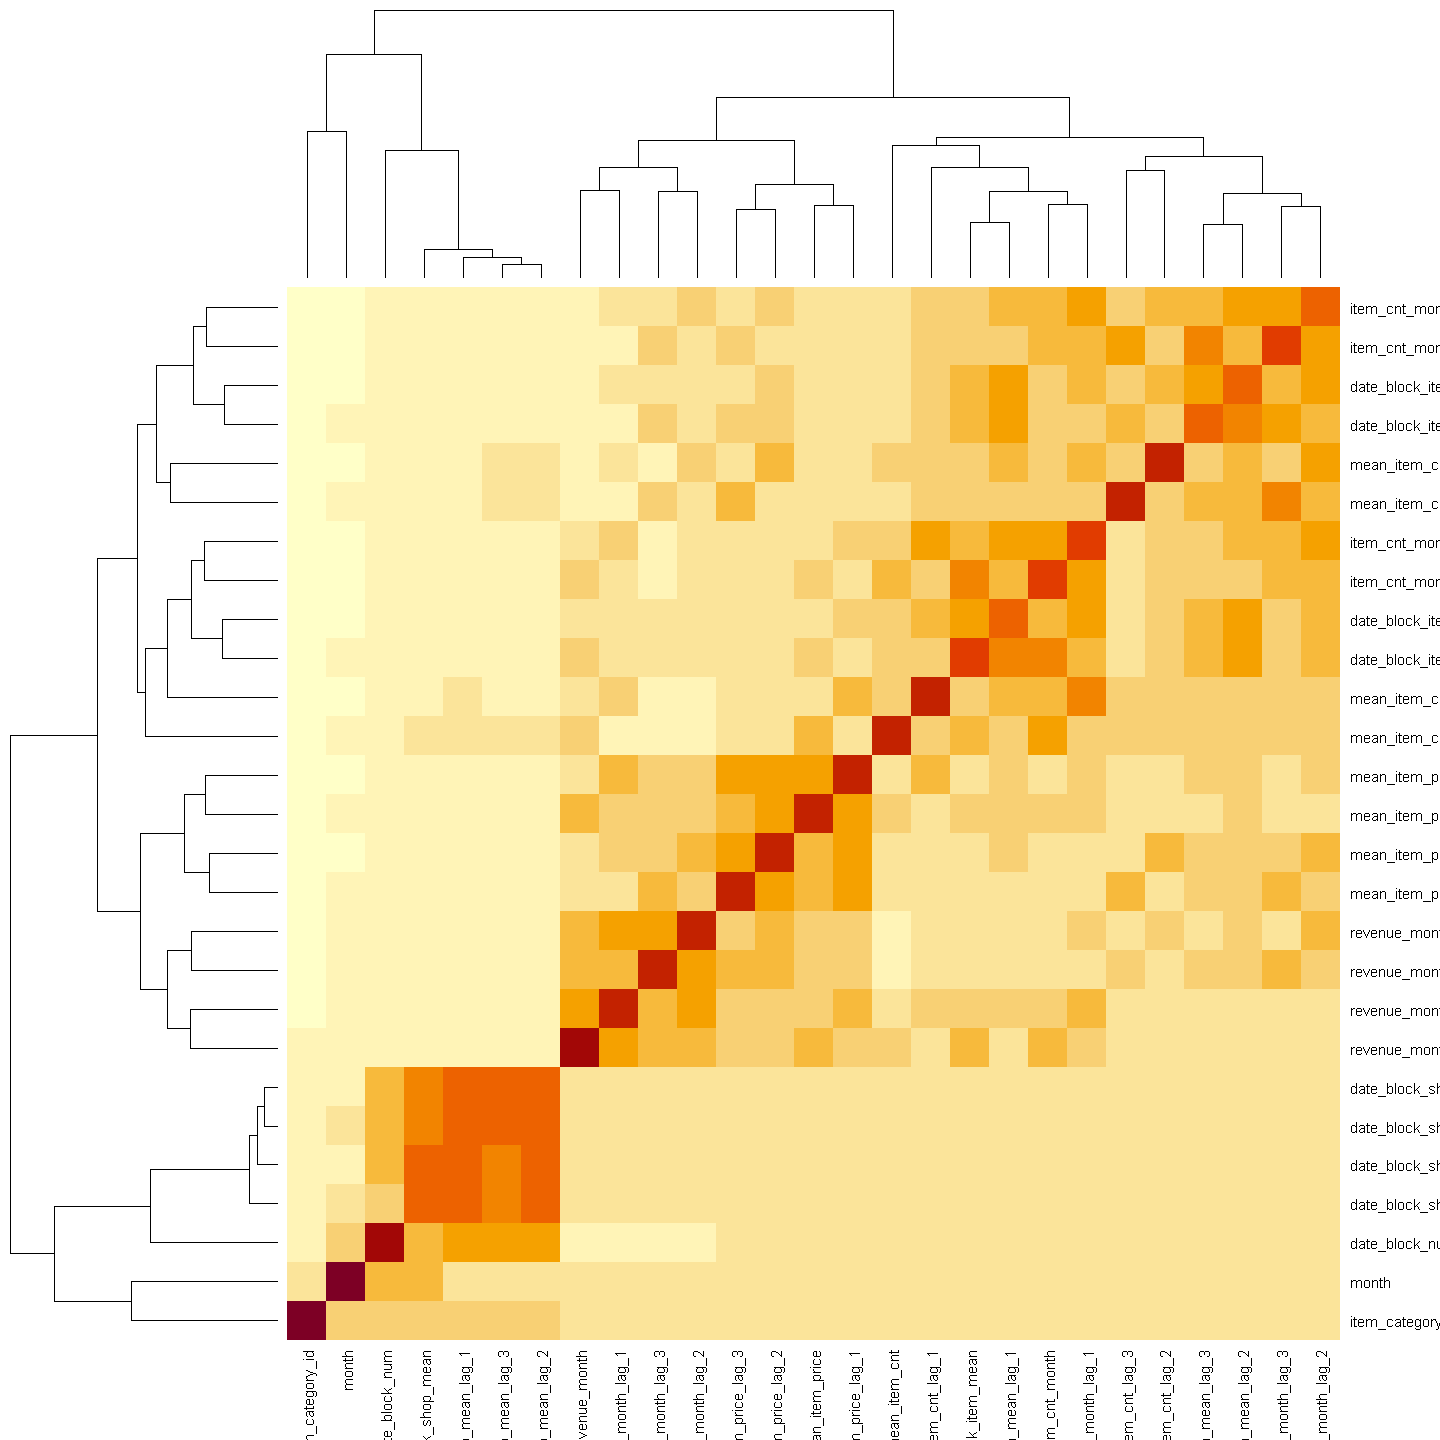

In [57]:
options(repr.plot.width=12, repr.plot.height=12)
heatmap(correlationMatrix)

In [58]:
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.7)
print(sort(highlyCorrelated))

[1]  3  8 10 14 15 16 20 21 22


We will consider anything that has a correlation of 0.5 to not be beneficial to our model. We cannot remove item index 3, this is our predictor variable

In [59]:
test_dataset4 <- test_dataset2[,-c(1:4,8,10,14,15,16,20,21,22)]
head(test_dataset4)

item_cnt_month mean_item_cnt mean_item_price month    
7282801 0              0             0               0.9090909
7282802 0              0             0               0.9090909
7282803 0              0             0               0.9090909
7282804 0              0             0               0.9090909
7282805 0              0             0               0.9090909
7282806 0              0             0               0.9090909
        date_block_item_mean item_cnt_month_lag_1 revenue_month_lag_1
7282801 0                    0.00                 0.0000000000       
7282802 0                    0.00                 0.0000000000       
7282803 0                    0.05                 0.0001914042       
7282804 0                    0.00                 0.0000000000       
7282805 0                    0.00                 0.0000000000       
7282806 0                    0.05                 0.0002392952       
        date_block_item_mean_lag_1 item_cnt_month_lag_2 revenue_month_lag_2
7282801 0.03125                    0.05                 0.0001196476       
7282802 0.00000                    0.00                 0.0000000000       
7282803 0.05250                    0.15                 0.0004784307       
7282804 0.03625                    0.00                 0.0000000000       
7282805 0.00000                    0.00                 0.0000000000       
7282806 0.03625                    0.05                 0.0001196476       
        date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
7282801 0.13500                    0.15                 4.785105e-04       
7282802 0.00000                    0.00                 0.000000e+00       
7282803 0.10000                    0.05                 9.562229e-05       
7282804 0.06000                    0.05                 9.562229e-05       
7282805 0.00000                    0.00                 0.000000e+00       
7282806 0.11625                    0.00                 0.000000e+00       
        mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
7282801 0.002               0.02983478            0.1459881                 
7282802 0.000               0.00000000            0.1459881                 
7282803 0.002               0.01788594            0.1459881                 
7282804 0.002               0.01788594            0.1459881                 
7282805 0.000               0.00000000            0.1459881                 
7282806 0.000               0.00000000            0.1459881                 
        date_block_item_mean_lag_3
7282801 0.14625                   
7282802 0.00000                   
7282803 0.18625                   
7282804 0.08000                   
7282805 0.00000                   
7282806 0.13250

In [60]:
train_monthly_sub4 <- train_monthly_sub2[,-c(1:4,8,10,14,15,16,20,21,22)]
head(train_monthly_sub4)

item_cnt_month mean_item_cnt mean_item_price month      date_block_item_mean
1 0              0             0               0.00000000 0                   
2 0              0             0               0.09090909 0                   
3 0              0             0               0.18181818 0                   
4 0              0             0               0.27272727 0                   
5 0              0             0               0.36363636 0                   
6 0              0             0               0.45454545 0                   
  item_cnt_month_lag_1 revenue_month_lag_1 date_block_item_mean_lag_1
1 0                    0                   0                         
2 0                    0                   0                         
3 0                    0                   0                         
4 0                    0                   0                         
5 0                    0                   0                         
6 0                    0                   0                         
  item_cnt_month_lag_2 revenue_month_lag_2 date_block_item_mean_lag_2
1 0                    0                   0                         
2 0                    0                   0                         
3 0                    0                   0                         
4 0                    0                   0                         
5 0                    0                   0                         
6 0                    0                   0                         
  item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
1 0                    0                   0                  
2 0                    0                   0                  
3 0                    0                   0                  
4 0                    0                   0                  
5 0                    0                   0                  
6 0                    0                   0                  
  mean_item_price_lag_3 date_block_shop_mean_lag_3 date_block_item_mean_lag_3
1 0                     0.00000000                 0                         
2 0                     0.00000000                 0                         
3 0                     0.00000000                 0                         
4 0                     0.00000000                 0                         
5 0                     0.02315503                 0                         
6 0                     0.04482417                 0

In [61]:
# Using dlpyr sample_frac() function, we are separating the dataset randomly, using 80% for training and 20% for validating
training_dataset4  <- train_monthly_sub4 %>% dplyr::sample_frac(0.8)
cat('\n -------------------------------------- TRAINING DATASET --------------------------------------')
head (training_dataset4)
# print ("Testing Dataset")
valid_dataset4   <- dplyr::anti_join(train_monthly_sub4,training_dataset4)
cat('\n -------------------------------------- VALIDATING DATASET --------------------------------------')
head (valid_dataset4)


 -------------------------------------- TRAINING DATASET --------------------------------------

item_cnt_month mean_item_cnt mean_item_price month      date_block_item_mean
1 0              0             0               0.45454545 0.00000             
2 0              0             0               0.72727273 0.00125             
3 0              0             0               0.72727273 0.00000             
4 0              0             0               0.72727273 0.01500             
5 0              0             0               0.09090909 0.00000             
6 0              0             0               0.00000000 0.00000             
  item_cnt_month_lag_1 revenue_month_lag_1 date_block_item_mean_lag_1
1 0                    0                   0.00000                   
2 0                    0                   0.00375                   
3 0                    0                   0.00000                   
4 0                    0                   0.01000                   
5 0                    0                   0.00000                   
6 0                    0                   0.00000                   
  item_cnt_month_lag_2 revenue_month_lag_2 date_block_item_mean_lag_2
1 0                    0                   0.00000                   
2 0                    0                   0.00375                   
3 0                    0                   0.00000                   
4 0                    0                   0.01875                   
5 0                    0                   0.00000                   
6 0                    0                   0.00000                   
  item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
1 0                    0                   0                  
2 0                    0                   0                  
3 0                    0                   0                  
4 0                    0                   0                  
5 0                    0                   0                  
6 0                    0                   0                  
  mean_item_price_lag_3 date_block_shop_mean_lag_3 date_block_item_mean_lag_3
1 0                     0.06451213                 0.0000                    
2 0                     0.09843982                 0.0050                    
3 0                     0.05423477                 0.0000                    
4 0                     0.15725607                 0.0175                    
5 0                     0.17880139                 0.0000                    
6 0                     0.00000000                 0.0000

Joining, by = c("item_cnt_month", "mean_item_cnt", "mean_item_price", "month", "date_block_item_mean",
"item_cnt_month_lag_1", "revenue_month_lag_1", "date_block_item_mean_lag_1", "item_cnt_month_lag_2",
"revenue_month_lag_2", "date_block_item_mean_lag_2", "item_cnt_month_lag_3", "revenue_month_lag_3",
"mean_item_cnt_lag_3", "mean_item_price_lag_3", "date_block_shop_mean_lag_3", "date_block_item_mean_lag_3")



 -------------------------------------- VALIDATING DATASET --------------------------------------

item_cnt_month mean_item_cnt mean_item_price month     date_block_item_mean
1 0.05           0.002         0.03486857      0.4545455 0.11875             
2 0.15           0.002         0.02324184      0.6363636 0.14625             
3 0.00           0.000         0.00000000      0.9090909 0.06750             
4 0.00           0.000         0.00000000      0.2727273 0.03125             
5 0.00           0.000         0.00000000      0.4545455 0.11875             
6 0.00           0.000         0.00000000      0.7272727 0.13500             
  item_cnt_month_lag_1 revenue_month_lag_1 date_block_item_mean_lag_1
1 0.05                 0.0002073679        0.10250                   
2 0.05                 0.0002392952        0.06625                   
3 0.00                 0.0000000000        0.06500                   
4 0.00                 0.0000000000        0.03625                   
5 0.00                 0.0000000000        0.10250                   
6 0.15                 0.0003588629        0.14625                   
  item_cnt_month_lag_2 revenue_month_lag_2 date_block_item_mean_lag_2
1 0.00                 0.0000000000        0.03125                   
2 0.05                 0.0002392952        0.11875                   
3 0.05                 0.0004148954        0.22875                   
4 0.00                 0.0000000000        0.04000                   
5 0.00                 0.0000000000        0.03125                   
6 0.00                 0.0000000000        0.06625                   
  item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
1 0.00                 0.0000000000        0.000              
2 0.05                 0.0002073679        0.002              
3 0.00                 0.0000000000        0.000              
4 0.00                 0.0000000000        0.000              
5 0.00                 0.0000000000        0.000              
6 0.00                 0.0000000000        0.000              
  mean_item_price_lag_3 date_block_shop_mean_lag_3 date_block_item_mean_lag_3
1 0.0000000             0.10747895                 0.03625                   
2 0.0387877             0.10314512                 0.10250                   
3 0.0000000             0.09943041                 0.00000                   
4 0.0000000             0.10797424                 0.10875                   
5 0.0000000             0.08940069                 0.03625                   
6 0.0000000             0.08283804                 0.11875

In [62]:
tic()
glm_res3<-glm(item_cnt_month~.,data=training_dataset4)
summary(glm_res3)
toc()
cat('\n-------------------------------- Result exploration --------------------------------')


Call:
glm(formula = item_cnt_month ~ ., data = training_dataset4)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.4954   -0.0005    0.0010    0.0017    0.9625  

Coefficients:
                             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                -1.715e-03  2.501e-05  -68.578  < 2e-16 ***
mean_item_cnt               1.124e+01  1.413e-02  794.992  < 2e-16 ***
mean_item_price             3.418e-01  1.200e-03  284.871  < 2e-16 ***
month                      -4.159e-04  3.876e-05  -10.729  < 2e-16 ***
date_block_item_mean        8.246e-01  4.696e-04 1755.865  < 2e-16 ***
item_cnt_month_lag_1        3.542e-01  4.008e-04  883.723  < 2e-16 ***
revenue_month_lag_1         1.201e-01  1.755e-02    6.845 7.63e-12 ***
date_block_item_mean_lag_1 -3.369e-01  6.639e-04 -507.532  < 2e-16 ***
item_cnt_month_lag_2        1.469e-01  4.320e-04  340.056  < 2e-16 ***
revenue_month_lag_2         5.821e-02  1.805e-02    3.226  0.00126 ** 
date_block_it

19 sec elapsed

-------------------------------- Result exploration --------------------------------

* p-value : 
Our p-values are pretty much the same as before

* residuals : 
Residual Min has a new value of -10

In [63]:
cat('- Residuals using our training dataset:\n')
# Residual = square(Observed - Predicted)
mean((training_dataset4[,'item_cnt_month']-predict(glm_res3, training_dataset4))^2)

- Residuals using our training dataset:


[1] 0.0007961526

In [64]:
cat('- Residuals using our validating dataset:\n')
mean((valid_dataset4[,'item_cnt_month']-predict(glm_res3, valid_dataset4))^2)

- Residuals using our validating dataset:


[1] 0.002293821

In [65]:
fourth_predict_final<-predict(glm_res3,test_dataset4)
cat('- Residuals using our testing dataset:\n')
mean((test_dataset4[,'item_cnt_month']-fourth_predict_final)^2)

- Residuals using our testing dataset:


[1] 0.0004292296

Our previous residual from our testing data was of 0.000512673774937672, we now have a residual that is closer to 0 by removing features that are highly correlated.

In [66]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = fourth_predict_final)
head(results)
write.csv(results,file="results/final_results/data_3.csv",row.names = FALSE)
rm(list=c('glm_res3','fourth_predict_final','results'))

ID item_cnt_month
7282801 0  -0.0286173980 
7282802 1  -0.0006344232 
7282803 2  -0.0139323851 
7282804 3  -0.0298930706 
7282805 4  -0.0006344232 
7282806 5  -0.0206540529

Fourth result:

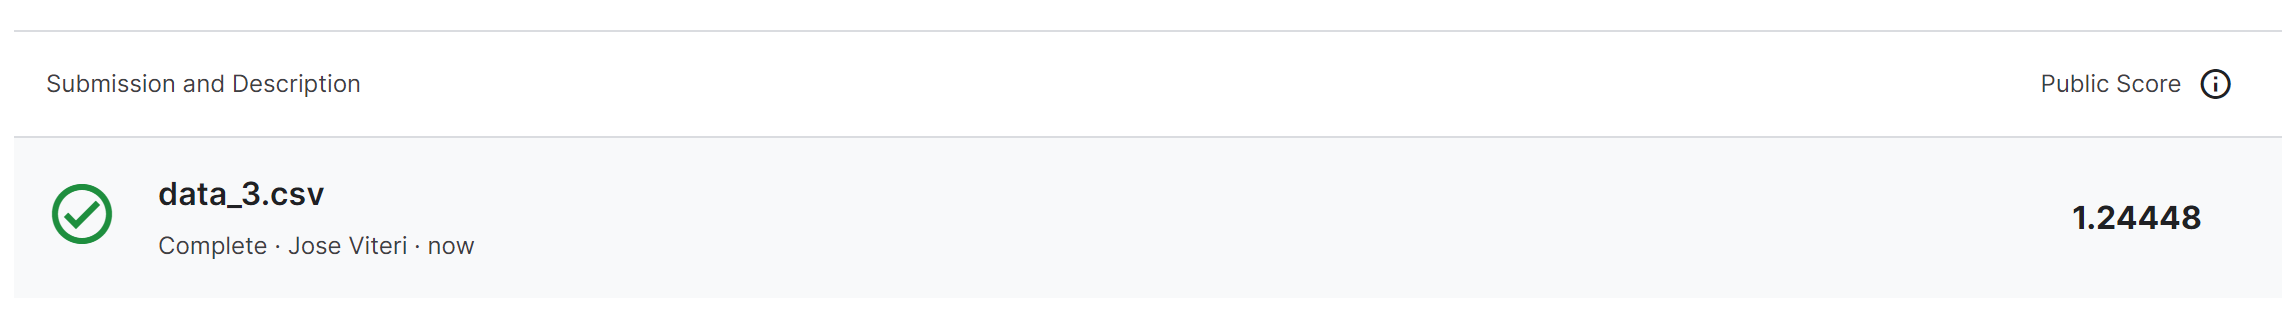

An improvement was made after removing unnecessary features using our correlation matrix. It seems like our improvements are small, we will now create new features and work with other machine learning models.

<p style="background-color:rgb(120,200,124);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">5. Generalized linear regression - feature engineering - adding new features</p>

In [67]:
train_monthly_sub5<-train_monthly
date_block_shop_mean<-train_monthly_sub5%>%group_by(date_block_num,shop_id)%>%summarize(date_block_shop_mean=mean(item_cnt_month))
head(date_block_shop_mean)
head(train_monthly_sub5)
# train_monthly_sub5<-train_monthly_sub5%>%left_join(date_block_shop_mean,by=c('date_block_num', 'shop_id'))
# head(train_monthly_sub5)

`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


date_block_num shop_id date_block_shop_mean
1 0              2       0.04901961          
2 0              3       0.03666667          
3 0              4       0.08901961          
4 0              5       0.00000000          
5 0              6       0.15862745          
6 0              7       0.10882353

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean date_block_item_mean
1 0               0             0     0.00000000           0                   
2 0               0             1     0.03666667           0                   
3 0               0             2     0.07098039           0                   
4 0               0             3     0.04941176           0                   
5 0               0             4     0.05823529           0                   
6 0               0             5     0.06686275           0

In [68]:
date_block_item_mean<-train_monthly_sub5%>%group_by(date_block_num,item_id)%>%summarize(date_block_item_mean=mean(item_cnt_month))
head(date_block_item_mean)

# train_monthly_sub5<-train_monthly_sub5%>%left_join(date_block_item_mean,by=c('date_block_num', 'item_id'))
date_category_mean<-train_monthly_sub5%>%group_by(date_block_num,item_category_id)%>%summarize(date_cat_mean=mean(item_category_id))
head(date_category_mean)

train_monthly_sub5<-train_monthly_sub5%>%left_join(date_category_mean,by=c('date_block_num', 'item_category_id'))
train_monthly_sub5[is.na(train_monthly_sub5)]<-0
head(train_monthly_sub5)

`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


date_block_num item_id date_block_item_mean
1 0              30      0.00000000          
2 0              31      0.00000000          
3 0              32      4.50000000          
4 0              33      1.07142857          
5 0              38      0.00000000          
6 0              42      0.04761905

`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


date_block_num item_category_id date_cat_mean
1 0              0                0            
2 0              2                2            
3 0              3                3            
4 0              5                5            
5 0              6                6            
6 0              7                7

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean date_block_item_mean
1 0               0             0     0.00000000           0                   
2 0               0             1     0.03666667           0                   
3 0               0             2     0.07098039           0                   
4 0               0             3     0.04941176           0                   
5 0               0             4     0.05823529           0                   
6 0               0             5     0.06686275           0                   
  date_cat_mean
1 19           
2 19           
3 19           
4 19           
5 19           
6 19

In [69]:
temp<- train_monthly_sub5[,c("date_block_num", "shop_id","item_id","item_cnt_month","revenue_month","mean_item_cnt","mean_item_price","date_block_shop_mean","date_block_item_mean","date_cat_mean")]
for (i in 1:3){
    shifted<-temp
    names(shifted) <-c("date_block_num", "shop_id", "item_id", sprintf("item_cnt_month_lag_%d",i),sprintf("revenue_month_lag_%d",i),sprintf("mean_item_cnt_lag_%d",i),sprintf("mean_item_price_lag_%d",i),sprintf("date_block_shop_mean_lag_%d",i),sprintf("date_block_item_mean_lag_%d",i),sprintf("date_cat_mean_lag_%d",i))
    shifted[,"date_block_num"]<-shifted[,"date_block_num"]+i
    train_monthly_sub5<-train_monthly_sub5%>%left_join(shifted,by=c('date_block_num','shop_id','item_id'))
}
train_monthly_sub5[is.na(train_monthly_sub5)]<-0
train_monthly_sub5['qmean_item_cnt']<-apply(train_monthly_sub5[,c('item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3')], 1, mean, na.rm=TRUE)
train_monthly_sub5['qmax_item_cnt'] <- apply(train_monthly_sub5[,c('item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3')], 1, max, na.rm=TRUE)
train_monthly_sub5['qstd_item_cnt'] <- apply(train_monthly_sub5[,c('item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3')], 1, sd, na.rm=TRUE)
train_monthly_sub5['qmin_item_cnt'] <- apply(train_monthly_sub5[,c('item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3')], 1, min, na.rm=TRUE)
head(train_monthly_sub5)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean ⋯
1 0               0             0     0.00000000           ⋯
2 0               0             1     0.03666667           ⋯
3 0               0             2     0.07098039           ⋯
4 0               0             3     0.04941176           ⋯
5 0               0             4     0.05823529           ⋯
6 0               0             5     0.06686275           ⋯
  revenue_month_lag_3 mean_item_cnt_lag_3 mean_item_price_lag_3
1 0                   0                   0                    
2 0                   0                   0                    
3 0                   0                   0                    
4 0                   0                   0                    
5 0                   0                   0                    
6 0                   0                   0                    
  date_block_shop_mean_lag_3 date_block_item_mean_lag_3 date_cat_mean_lag_3
1 0.00000000                 0                           0                 
2 0.00000000                 0                           0                 
3 0.00000000                 0                           0                 
4 0.00000000                 0                          19                 
5 0.03666667                 0                          19                 
6 0.07098039                 0                          19                 
  qmean_item_cnt qmax_item_cnt qstd_item_cnt qmin_item_cnt
1 0              0             0             0            
2 0              0             0             0            
3 0              0             0             0            
4 0              0             0             0            
5 0              0             0             0            
6 0              0             0             0

In [70]:
summary(train_monthly_sub5)

 date_block_num    shop_id      item_category_id    item_id     
 Min.   : 0     Min.   : 2.00   Min.   : 0.00    Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.:37.00    1st Qu.: 5382  
 Median :17     Median :34.50   Median :43.00    Median :11203  
 Mean   :17     Mean   :31.64   Mean   :46.31    Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:58.00    3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :83.00    Max.   :22167  
 item_cnt_month    mean_item_cnt      mean_item_price    revenue_month    
 Min.   : 0.0000   Min.   :  0.0000   Min.   :    0.00   Min.   :      0  
 1st Qu.: 0.0000   1st Qu.:  0.0000   1st Qu.:    0.00   1st Qu.:      0  
 Median : 0.0000   Median :  0.0000   Median :    0.00   Median :      0  
 Mean   : 0.1837   Mean   :  0.0879   Mean   :   73.12   Mean   :    230  
 3rd Qu.: 0.0000   3rd Qu.:  0.0000   3rd Qu.:    0.00   3rd Qu.:      0  
 Max.   :20.0000   Max.   :500.0000   Max.   :42990.00   Max.   :6264230  
     month        da

In [71]:
minMax <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
y_min<-min(train_monthly_sub5$item_cnt_month)
y_max<-max(train_monthly_sub5$item_cnt_month)
train_monthly_sub5[,c('mean_item_cnt','mean_item_price','revenue_month','date_block_shop_mean',
                      'date_block_item_mean','date_block_item_mean_lag_1','date_block_item_mean_lag_2',
                      'date_block_item_mean_lag_3','date_block_shop_mean_lag_1','date_block_shop_mean_lag_2',
                      'date_block_shop_mean_lag_3','item_cnt_month_lag_1','revenue_month_lag_1','mean_item_cnt_lag_1',
                      'mean_item_price_lag_1','item_cnt_month_lag_2','revenue_month_lag_2','mean_item_cnt_lag_2',
                      'mean_item_price_lag_2','item_cnt_month_lag_3','revenue_month_lag_3','mean_item_cnt_lag_3',
                      'mean_item_price_lag_3','date_cat_mean','date_cat_mean_lag_1','date_cat_mean_lag_2',
                      'date_cat_mean_lag_3')]<-apply(train_monthly_sub5[,c('mean_item_cnt','mean_item_price',
                                                                           'revenue_month','date_block_shop_mean','date_block_item_mean','date_block_item_mean_lag_1','date_block_item_mean_lag_2','date_block_item_mean_lag_3','date_block_shop_mean_lag_1','date_block_shop_mean_lag_2','date_block_shop_mean_lag_3','item_cnt_month_lag_1','revenue_month_lag_1','mean_item_cnt_lag_1','mean_item_price_lag_1','item_cnt_month_lag_2','revenue_month_lag_2','mean_item_cnt_lag_2','mean_item_price_lag_2','item_cnt_month_lag_3','revenue_month_lag_3','mean_item_cnt_lag_3','mean_item_price_lag_3','date_cat_mean','date_cat_mean_lag_1','date_cat_mean_lag_2','date_cat_mean_lag_3')],2,minMax)

In [72]:
clip<-function(x){
    ifelse(x>20,20,ifelse(x<0,0,x))
}

In [73]:
training_dataset5<-train_monthly_sub5[(train_monthly_sub5$date_block_num<33&train_monthly_sub5$date_block_num>2),-which(names(train_monthly_sub5) %in% c('mean_item_price','revenue_month','mean_item_cnt', 'date_block_shop_mean','date_block_item_mean','date_cat_mean'))]
valid_dataset5<-train_monthly_sub5[train_monthly_sub5$date_block_num==33,-which(names(train_monthly_sub5) %in% c('mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean','date_cat_mean'))]
test_dataset5<-train_monthly_sub5[train_monthly_sub5$date_block_num==34,-which(names(train_monthly_sub5) %in% c('mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean','date_cat_mean'))]

In [74]:
tic()
glm_res4<-glm(item_cnt_month~.,data=training_dataset5, na.action = na.exclude)#glm(item_cnt_month~.,data=train)
summary(glm_res4)
toc()
cat('\n-------------------------------- Result exploration --------------------------------')


Call:
glm(formula = item_cnt_month ~ ., data = training_dataset5, na.action = na.exclude)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-19.6972   -0.0977   -0.0449   -0.0032   20.0572  

Coefficients: (3 not defined because of singularities)
                             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                -8.538e-03  1.454e-03   -5.871 4.33e-09 ***
date_block_num             -7.049e-04  3.812e-05  -18.491  < 2e-16 ***
shop_id                     1.966e-05  1.752e-05    1.122    0.262    
item_category_id            1.994e+03  1.262e+05    0.016    0.987    
item_id                    -1.198e-06  5.113e-08  -23.428  < 2e-16 ***
month                       1.172e-02  9.802e-05  119.612  < 2e-16 ***
item_cnt_month_lag_1        6.782e+00  2.140e-02  316.966  < 2e-16 ***
revenue_month_lag_1         5.835e+00  3.941e-01   14.808  < 2e-16 ***
mean_item_cnt_lag_1         9.661e+00  4.769e-01   20.258  < 2e-16 ***
mean_item_price_lag

48.12 sec elapsed

-------------------------------- Result exploration --------------------------------

In [75]:
cat('- Residuals using our training dataset:\n')
# Residual = square(Observed - Predicted)
mean((training_dataset5[,'item_cnt_month']-predict(glm_res4, training_dataset5))^2)

- Residuals using our training dataset:


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.6076832

In [76]:
cat('- Residuals using our validating dataset:\n')
mean((valid_dataset5[,'item_cnt_month']-predict(glm_res4, valid_dataset5))^2)

- Residuals using our validating dataset:


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.8124062

In [77]:
fifth_predict_final<-predict(glm_res4,test_dataset5)
cat('- Residuals using our testing dataset:\n')
mean((test_dataset5[,'item_cnt_month']-fifth_predict_final)^2)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


- Residuals using our testing dataset:


[1] 0.5880199

In [78]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = fifth_predict_final)
head(results)
write.csv(results,file="results/final_results/data_4.csv",row.names = FALSE)
rm(list=c('glm_res4','fifth_predict_final','results'))

ID item_cnt_month
7282801 0  0.2885534     
7282802 1  0.0946003     
7282803 2  1.1770726     
7282804 3  0.2900777     
7282805 4  0.1325809     
7282806 5  0.4337106

Fifth result:

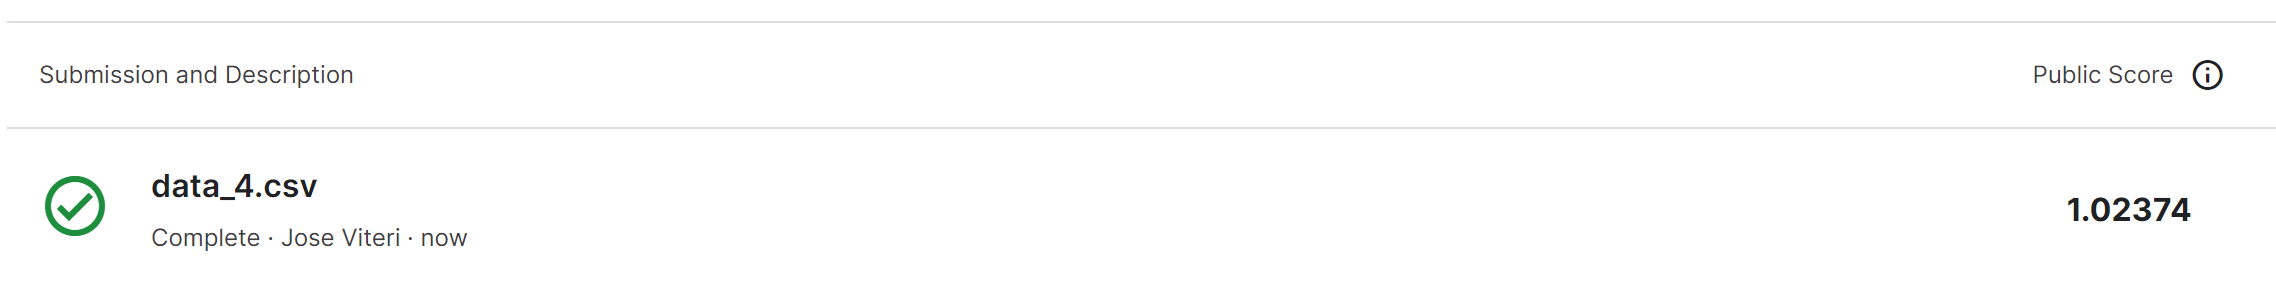

Creating new features has generated a great leap in our results, it is now 1.02374, in comparison to our previous score of 1.24448.

<p style="background-color:rgb(120,200,124);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">6. Generalized linear regression - correlation matrix 2 </p>

In [79]:
correlationMatrix <- cor(training_dataset5)
correlationMatrix

date_block_num shop_id       item_category_id
date_block_num              1.00000000     0.000000e+00  0.000000e+00   
shop_id                     0.00000000     1.000000e+00 -4.594033e-19   
item_category_id            0.00000000    -4.594033e-19  1.000000e+00   
item_id                     0.00000000     2.575134e-20  2.679244e-01   
item_cnt_month              0.04608944     5.669877e-03 -7.092535e-02   
month                      -0.02482131     0.000000e+00  0.000000e+00   
item_cnt_month_lag_1        0.04694089     5.563988e-03 -6.949372e-02   
revenue_month_lag_1         0.01129537    -1.243587e-03 -4.005334e-02   
mean_item_cnt_lag_1         0.06987571     4.729179e-03 -5.249357e-02   
mean_item_price_lag_1       0.07131626    -7.831679e-04 -1.018041e-01   
date_block_shop_mean_lag_1  0.31487288     3.732244e-02 -4.189276e-21   
date_block_item_mean_lag_1  0.06548466     7.933533e-20 -9.694686e-02   
date_cat_mean_lag_1         0.00000000    -9.147094e-19  1.000000e+00   
item_cnt_month_lag_2        0.04781518     5.057350e-03 -6.777730e-02   
revenue_month_lag_2         0.01245418    -1.328244e-03 -3.922112e-02   
mean_item_cnt_lag_2         0.06888230     4.151727e-03 -5.016398e-02   
mean_item_price_lag_2       0.07233219    -1.100874e-03 -9.982872e-02   
date_block_shop_mean_lag_2  0.32321739     3.418629e-02  4.388747e-20   
date_block_item_mean_lag_2  0.06660115    -3.749502e-19 -9.440612e-02   
date_cat_mean_lag_2         0.00000000    -9.147094e-19  1.000000e+00   
item_cnt_month_lag_3        0.05024505     4.672153e-03 -6.717182e-02   
revenue_month_lag_3         0.01390917    -1.362850e-03 -3.855360e-02   
mean_item_cnt_lag_3         0.06938856     3.741821e-03 -4.872767e-02   
mean_item_price_lag_3       0.07361809    -1.262289e-03 -9.773921e-02   
date_block_shop_mean_lag_3  0.34168097     3.177200e-02  1.296712e-20   
date_block_item_mean_lag_3  0.06987563     1.020394e-19 -9.341562e-02   
date_cat_mean_lag_3         0.00000000    -9.147094e-19  1.000000e+00   
qmean_item_cnt              0.05623966     5.933995e-03 -7.930745e-02   
qmax_item_cnt               0.07139781     4.326641e-03 -9.060160e-02   
qstd_item_cnt               0.08026140     2.347874e-03 -9.232908e-02   
qmin_item_cnt               0.01993291     5.789306e-03 -4.020486e-02   
                           item_id       item_cnt_month month       
date_block_num              0.000000e+00  0.046089438   -0.024821308
shop_id                     2.575134e-20  0.005669877    0.000000000
item_category_id            2.679244e-01 -0.070925353    0.000000000
item_id                     1.000000e+00 -0.046734737    0.000000000
item_cnt_month             -4.673474e-02  1.000000000    0.013957717
month                       0.000000e+00  0.013957717    1.000000000
item_cnt_month_lag_1       -4.628353e-02  0.642532374   -0.018149045
revenue_month_lag_1        -2.183774e-02  0.221524320   -0.004981443
mean_item_cnt_lag_1        -3.594251e-02  0.377405834   -0.013065707
mean_item_price_lag_1      -6.074358e-02  0.238246406   -0.016558113
date_block_shop_mean_lag_1 -1.559225e-21  0.137967775   -0.121741223
date_block_item_mean_lag_1 -6.456761e-02  0.536844693   -0.025318733
date_cat_mean_lag_1         2.679244e-01 -0.070925353    0.000000000
item_cnt_month_lag_2       -4.634872e-02  0.528926128   -0.022341062
revenue_month_lag_2        -2.169086e-02  0.183189257   -0.008842776
mean_item_cnt_lag_2        -3.559951e-02  0.309950981   -0.016899566
mean_item_price_lag_2      -6.106069e-02  0.205178398   -0.020257883
date_block_shop_mean_lag_2 -3.098551e-22  0.132775266   -0.151019394
date_block_item_mean_lag_2 -6.455853e-02  0.437659486   -0.031118576
date_cat_mean_lag_2         2.679244e-01 -0.070925353    0.000000000
item_cnt_month_lag_3       -4.664662e-02  0.470242284   -0.019306104
revenue_month_lag_3        -2.137407e-02  0.168873671   -0.007559140
mean_item_cnt_lag_3        -3.550538e-02  0.282355004   -0.013202331
mean_item_price_lag_3      -6.07818

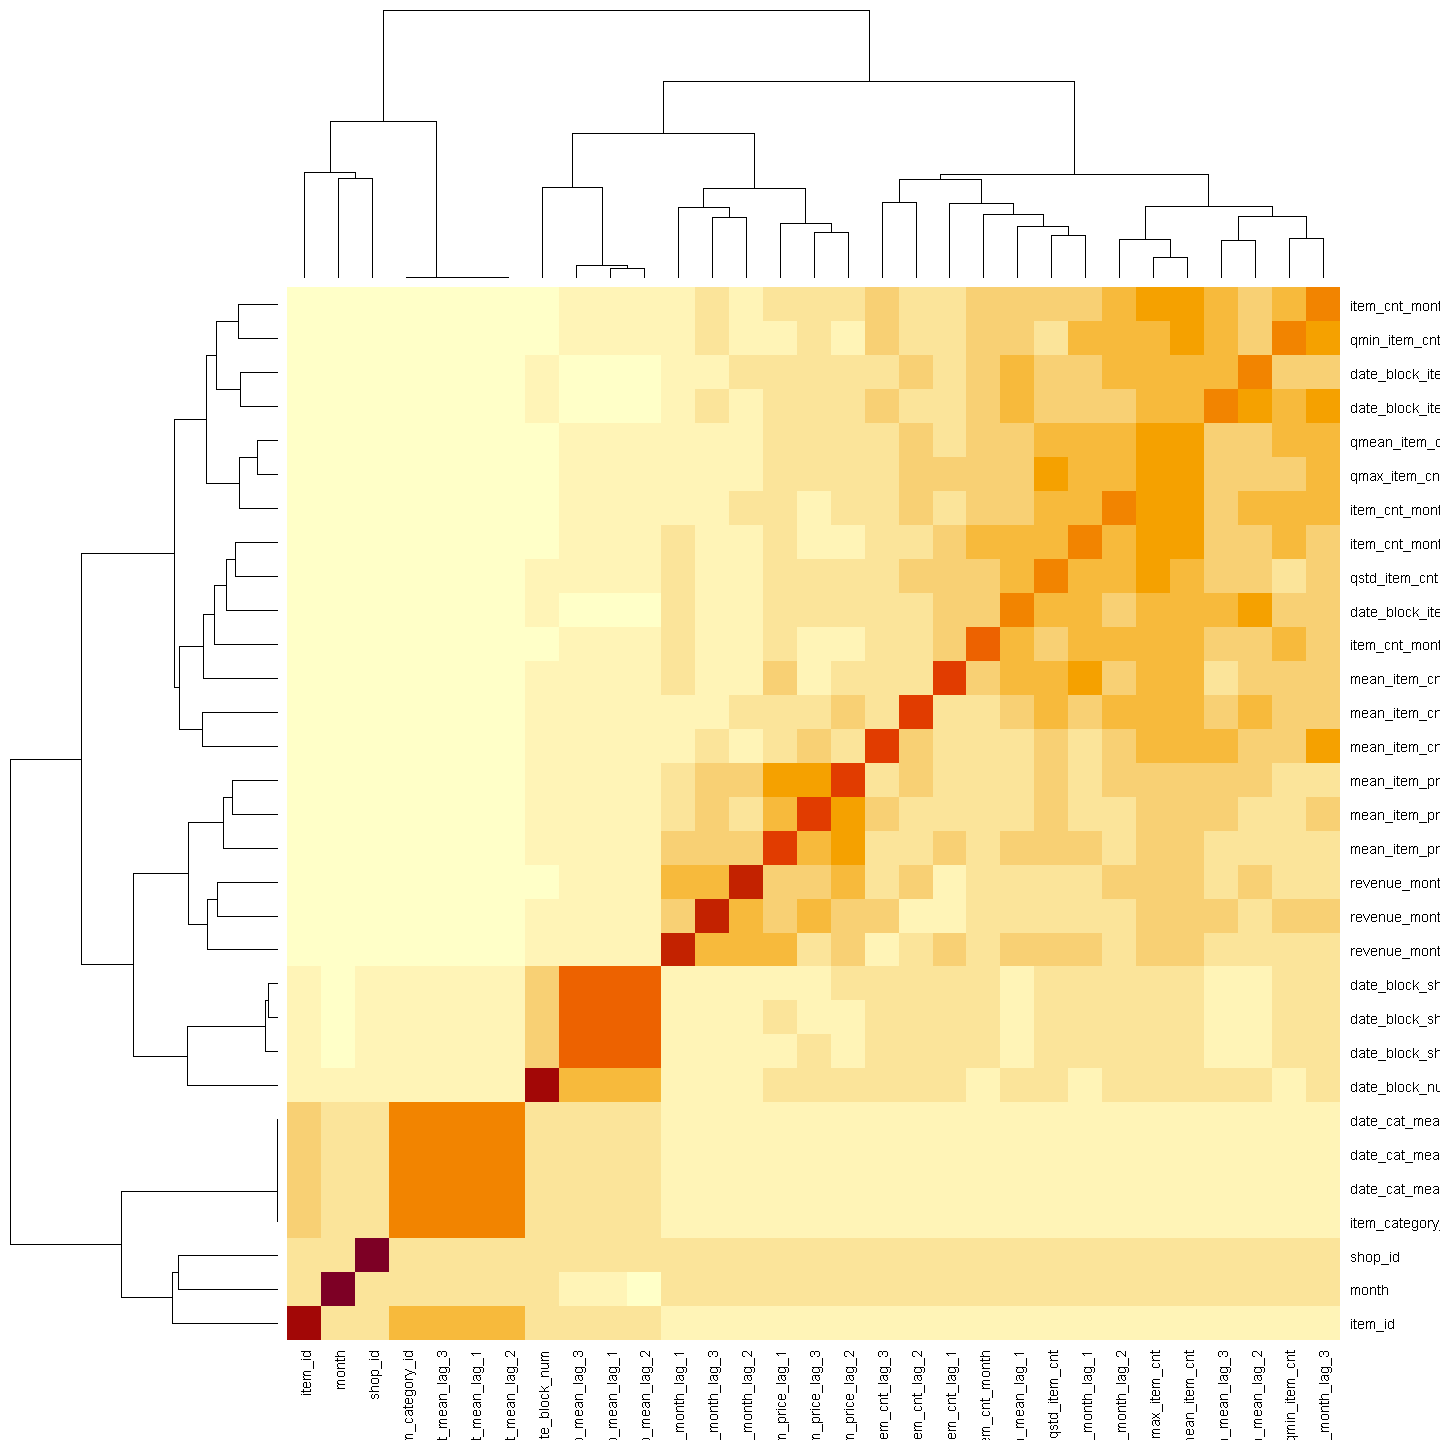

In [80]:
options(repr.plot.width=12, repr.plot.height=12)
heatmap(correlationMatrix)

In [81]:
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
print(sort(highlyCorrelated))

[1]  3 11 19 20 21 25 27 28 29


In [82]:
training_dataset6 <- training_dataset5[,-c(1:4,6,11,19,20,21,25,27,28,29)]
head(training_dataset6)

item_cnt_month item_cnt_month_lag_1 revenue_month_lag_1 mean_item_cnt_lag_1
4 0              0                    0                   0                  
5 0              0                    0                   0                  
6 0              0                    0                   0                  
7 0              0                    0                   0                  
8 0              0                    0                   0                  
9 0              0                    0                   0                  
  mean_item_price_lag_1 date_block_item_mean_lag_1 date_cat_mean_lag_1
4 0                     0                          0.2289157          
5 0                     0                          0.2289157          
6 0                     0                          0.2289157          
7 0                     0                          0.2289157          
8 0                     0                          0.2289157          
9 0                     0                          0.2289157          
  item_cnt_month_lag_2 revenue_month_lag_2 mean_item_cnt_lag_2
4 0                    0                   0                  
5 0                    0                   0                  
6 0                    0                   0                  
7 0                    0                   0                  
8 0                    0                   0                  
9 0                    0                   0                  
  mean_item_price_lag_2 date_block_shop_mean_lag_2 revenue_month_lag_3
4 0                     0.02315503                 0                  
5 0                     0.04482417                 0                  
6 0                     0.03120357                 0                  
7 0                     0.03677563                 0                  
8 0                     0.04222387                 0                  
9 0                     0.03962358                 0                  
  mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_item_mean_lag_3
4 0                   0                     0                         
5 0                   0                     0                         
6 0                   0                     0                         
7 0                   0                     0                         
8 0                   0                     0                         
9 0                   0                     0                         
  qstd_item_cnt qmin_item_cnt
4 0             0            
5 0             0            
6 0             0            
7 0             0            
8 0             0            
9 0             0

In [83]:
valid_dataset6 <- valid_dataset5[,-c(1:4,6,11,19,20,21,25,27,28,29)]
head(valid_dataset6)

item_cnt_month item_cnt_month_lag_1 revenue_month_lag_1 mean_item_cnt_lag_1
34  0              0.05                 0.0001196476        0.002              
68  0              0.00                 0.0000000000        0.000              
102 1              0.00                 0.0000000000        0.000              
136 0              0.00                 0.0000000000        0.000              
170 0              0.05                 0.0001196476        0.002              
204 2              0.15                 0.0004785105        0.002              
    mean_item_price_lag_1 date_block_item_mean_lag_1 date_cat_mean_lag_1
34  0.01743429            0.135                      0.2289157          
68  0.00000000            0.135                      0.2289157          
102 0.00000000            0.135                      0.2289157          
136 0.00000000            0.135                      0.2289157          
170 0.01743429            0.135                      0.2289157          
204 0.02324184            0.135                      0.2289157          
    item_cnt_month_lag_2 revenue_month_lag_2 mean_item_cnt_lag_2
34  0.15                 0.0004785105        0.002              
68  0.15                 0.0003588629        0.006              
102 0.05                 0.0001195678        0.002              
136 0.00                 0.0000000000        0.000              
170 0.05                 0.0001195678        0.002              
204 0.10                 0.0004785903        0.002              
    mean_item_price_lag_2 date_block_shop_mean_lag_2 revenue_month_lag_3
34  0.02983478            0.14598811                 0.0002392952       
68  0.02237484            0.10029718                 0.0000000000       
102 0.02236489            0.17521050                 0.0002392952       
136 0.00000000            0.07540862                 0.0000000000       
170 0.02236489            0.10871719                 0.0004785903       
204 0.04475963            0.16295196                 0.0004785903       
    mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_item_mean_lag_3
34  0.002               0.04475963            0.06625                   
68  0.000               0.00000000            0.06625                   
102 0.002               0.04475963            0.06625                   
136 0.000               0.00000000            0.06625                   
170 0.002               0.04475963            0.06625                   
204 0.004               0.04475963            0.06625                   
    qstd_item_cnt qmin_item_cnt
34  1.1547005     1            
68  1.7320508     0            
102 0.5773503     0            
136 0.0000000     0            
170 0.5773503     1            
204 0.5773503     2

In [84]:
test_dataset6 <- test_dataset5[,-c(1:4,6,11,19,20,21,25,27,28,29)]
head(test_dataset6)

item_cnt_month item_cnt_month_lag_1 revenue_month_lag_1
7282801 0              0.00                 0.0000000000       
7282802 0              0.00                 0.0000000000       
7282803 0              0.05                 0.0001914042       
7282804 0              0.00                 0.0000000000       
7282805 0              0.00                 0.0000000000       
7282806 0              0.05                 0.0002392952       
        mean_item_cnt_lag_1 mean_item_price_lag_1 date_block_item_mean_lag_1
7282801 0.000               0.00000000            0.03125                   
7282802 0.000               0.00000000            0.00000                   
7282803 0.002               0.02789021            0.05250                   
7282804 0.000               0.00000000            0.03625                   
7282805 0.000               0.00000000            0.00000                   
7282806 0.002               0.03486857            0.03625                   
        date_cat_mean_lag_1 item_cnt_month_lag_2 revenue_month_lag_2
7282801 0.2289157           0.05                 0.0001196476       
7282802 0.6626506           0.00                 0.0000000000       
7282803 0.2289157           0.15                 0.0004784307       
7282804 0.2771084           0.00                 0.0000000000       
7282805 0.2409639           0.00                 0.0000000000       
7282806 0.2771084           0.05                 0.0001196476       
        mean_item_cnt_lag_2 mean_item_price_lag_2 date_block_shop_mean_lag_2
7282801 0.002               0.02237981            0.1239475                 
7282802 0.000               0.00000000            0.1239475                 
7282803 0.002               0.02982980            0.1239475                 
7282804 0.000               0.00000000            0.1239475                 
7282805 0.000               0.00000000            0.1239475                 
7282806 0.002               0.02237981            0.1239475                 
        revenue_month_lag_3 mean_item_cnt_lag_3 mean_item_price_lag_3
7282801 4.785105e-04        0.002               0.02983478           
7282802 0.000000e+00        0.000               0.00000000           
7282803 9.562229e-05        0.002               0.01788594           
7282804 9.562229e-05        0.002               0.01788594           
7282805 0.000000e+00        0.000               0.00000000           
7282806 0.000000e+00        0.000               0.00000000           
        date_block_item_mean_lag_3 qstd_item_cnt qmin_item_cnt
7282801 0.14625                    1.5275252     0            
7282802 0.00000                    0.0000000     0            
7282803 0.18625                    1.1547005     1            
7282804 0.08000                    0.5773503     0            
7282805 0.00000                    0.0000000     0            
7282806 0.13250                    0.5773503     0

In [85]:
tic()
glm_res5<-glm(item_cnt_month~.,data=training_dataset6, na.action = na.exclude)#glm(item_cnt_month~.,data=train)
summary(glm_res5)
toc()
cat('\n-------------------------------- Result exploration --------------------------------')


Call:
glm(formula = item_cnt_month ~ ., data = training_dataset6, na.action = na.exclude)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-19.8607   -0.0817   -0.0441   -0.0148   20.0433  

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.046840   0.001000  46.830  < 2e-16 ***
item_cnt_month_lag_1        5.826565   0.015758 369.749  < 2e-16 ***
revenue_month_lag_1        10.478289   0.393713  26.614  < 2e-16 ***
mean_item_cnt_lag_1         8.594580   0.477522  17.998  < 2e-16 ***
mean_item_price_lag_1      -3.253837   0.038780 -83.905  < 2e-16 ***
date_block_item_mean_lag_1  4.253179   0.013356 318.441  < 2e-16 ***
date_cat_mean_lag_1        -0.098440   0.001547 -63.625  < 2e-16 ***
item_cnt_month_lag_2        0.711546   0.013662  52.081  < 2e-16 ***
revenue_month_lag_2         8.694459   0.404208  21.510  < 2e-16 ***
mean_item_cnt_lag_2        -1.655484   0.481857  -3.436 0.000591 ***
mean_item_p

39.94 sec elapsed

-------------------------------- Result exploration --------------------------------

In [86]:
cat('- Residuals using our training dataset:\n')
# Residual = square(Observed - Predicted)
mean((training_dataset6[,'item_cnt_month']-predict(glm_res5, training_dataset6))^2)

- Residuals using our training dataset:


[1] 0.611468

In [87]:
cat('- Residuals using our validating dataset:\n')
mean((valid_dataset6[,'item_cnt_month']-predict(glm_res5, valid_dataset6))^2)

- Residuals using our validating dataset:


[1] 0.8133754

In [88]:
sixth_predict_final<-predict(glm_res5,test_dataset6)
cat('- Residuals using our testing dataset:\n')
mean((test_dataset6[,'item_cnt_month']-sixth_predict_final)^2)

- Residuals using our testing dataset:


[1] 0.5536263

In [90]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = sixth_predict_final)
head(results)
write.csv(results,file="results/final_results/data_5.csv",row.names = FALSE)
rm(list=c('glm_res5','sixth_predict_final','results'))

ID item_cnt_month
7282801 0  0.40018917    
7282802 1  0.04103057    
7282803 2  1.08515259    
7282804 3  0.28062090    
7282805 4  0.08254142    
7282806 5  0.41384182

Sixth result:

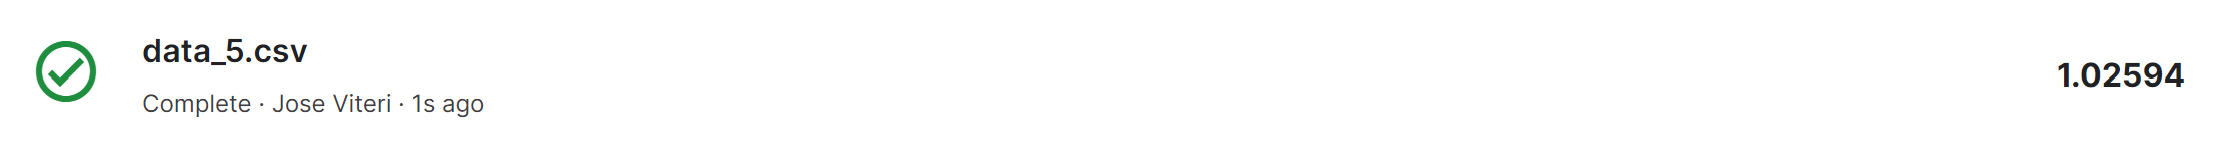

Removing the features by using a correlation matrix had a negative effect on our model's result, meaning, there are features that are needed for improving our score.

<p style="background-color:rgb(120,200,124);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">7. Ridge regression</p>

In [91]:
train<-train_monthly_sub5[(train_monthly_sub5$date_block_num<33&train_monthly_sub5$date_block_num>2),-which(names(train_monthly_sub5) %in% c('mean_item_price','revenue_month','mean_item_cnt', 'date_block_shop_mean','date_block_item_mean','date_cat_mean'))]
valid<-train_monthly_sub5[train_monthly_sub5$date_block_num==33,-which(names(train_monthly_sub5) %in% c('mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean','date_cat_mean'))]
test<-train_monthly_sub5[train_monthly_sub5$date_block_num==34,-which(names(train_monthly_sub5) %in% c('item_cnt_month','mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean','date_cat_mean'))]

In [92]:
x_train <- model.matrix(item_cnt_month~., train)[,-1]
y_train<-train$item_cnt_month
x_valid <- model.matrix(item_cnt_month~., valid)[,-1]
y_valid<-valid_dataset5$item_cnt_month
x_test <- data.matrix(test)

In [97]:
tic()
# gc()
ridge_mod_cv = cv.glmnet(x_train, y_train,nfolds=6, alpha = 0)
fit <- glmnet(x_train, y_train, alpha = 0)
summary(ridge_mod_cv)
toc()
cat('\n-------------------------------- Result exploration --------------------------------')

           Length Class  Mode     
lambda     100    -none- numeric  
cvm        100    -none- numeric  
cvsd       100    -none- numeric  
cvup       100    -none- numeric  
cvlo       100    -none- numeric  
nzero      100    -none- numeric  
call         5    -none- call     
name         1    -none- character
glmnet.fit  12    elnet  list     
lambda.min   1    -none- numeric  
lambda.1se   1    -none- numeric  
index        2    -none- numeric  

707.09 sec elapsed

-------------------------------- Result exploration --------------------------------

In [94]:
sqrt(mean((clip(predict(fit, s = ridge_mod_cv$lambda.min, newx = x_train))-train[,'item_cnt_month'])^2))
sqrt(mean((clip(predict(fit, s = ridge_mod_cv$lambda.min, newx = x_valid))-valid[,'item_cnt_month'])^2))

[1] 0.7801895

[1] 0.8987865

In [100]:
seventh_predict_final<-predict(fit,s = ridge_mod_cv$lambda.min,newx=x_test)
seventh_predict_final<-clip(seventh_predict_final)
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = seventh_predict_final
                  )
head(results)

ID s1        
7282801 0  0.44848007
7282802 1  0.09182242
7282803 2  1.18493203
7282804 3  0.30615099
7282805 4  0.12913700
7282806 5  0.46407298

In [102]:
colnames(results)<-c('ID','item_cnt_month')
write.csv(results,file="results/final_results/data_6.csv",row.names = FALSE)
rm(list=c('x_train','y_train','x_valid','y_valid','x_test','fit','results','ridge_mod_cv'))

ERROR: Error in colnames(results) <- c("ID", "item_cnt_month"): object 'results' not found


Sixth result:

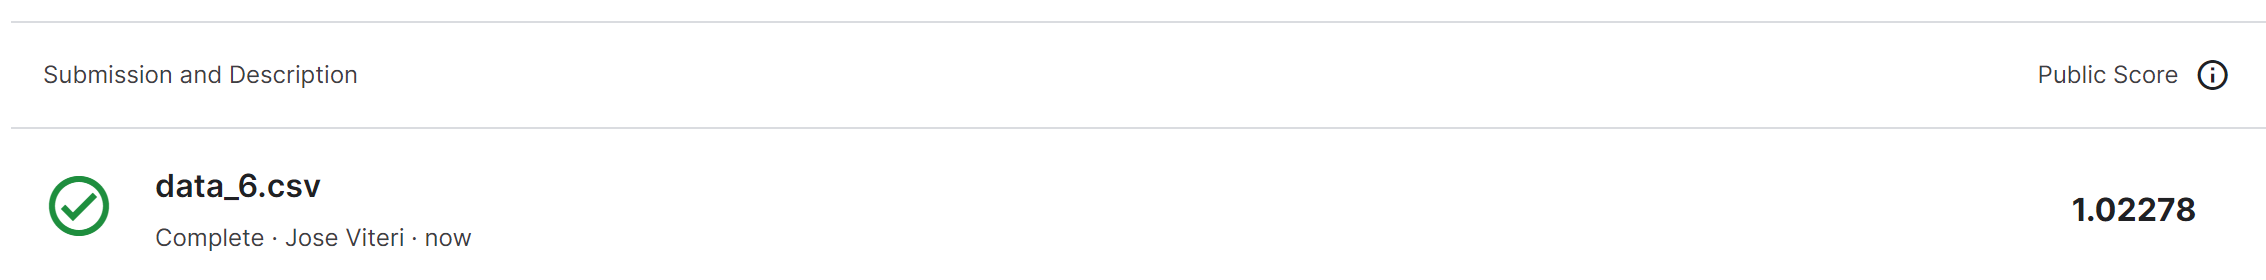

The new model pushed our score to 1.02278.

<p style="background-color:rgb(248,97,97);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">END</p>

In [ ]:
sqrt(mean((clip(predict(tem, train))-train[,'item_cnt_month'])^2))
sqrt(mean((clip(predict(tem, valid))-valid[,'item_cnt_month'])^2))

In [78]:
memory.size(max=TRUE)

Warning message:
"'memory.size()' is no longer supported"


[1] Inf

In [ ]:
tic()
gc()
classifier_RF = randomForest(x = training_dataset4[,-5],
                             y = training_dataset4$item_cnt_month,
                             ntree = 5)
toc()

used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells    8668311   463.0   23527850  1256.6   26368212  1408.3
Vcells 2249631113 17163.4 6358199369 48509.3 5602306492 42742.3

In [60]:
# norm_train_monthly<-preProcess(train_monthly[,c('item_cnt_month','mean_item_cnt','mean_item_price','revenue_month','month','date_block_shop_mean','date_block_item_mean')], method=c("range"))
# norm_train_monthly<-norm_train_monthly%>%left_join(train_monthly[,1:4])
norm_train_monthly<-preProcess(as.data.frame(train_dataset[,'item_cnt_month']),method=c("range"))
# head(norm_train_monthly$dim)

In [127]:
# norm_train_monthly

In [128]:
# Normalizing the data
# minMax <- function(x) {
#   (x - min(x)) / (max(x) - min(x))
# }
# y_min<-min(train_monthly$item_cnt_month)
# y_max<-max(train_monthly$item_cnt_month)
# train_monthly[,c('item_cnt_month','mean_item_cnt','mean_item_price','revenue_month','month','date_block_shop_mean','date_block_item_mean','date_block_item_mean_lag_1','date_block_item_mean_lag_2','date_block_item_mean_lag_3','date_block_shop_mean_lag_1','date_block_shop_mean_lag_2','date_block_shop_mean_lag_3','item_cnt_month_lag_1','revenue_month_lag_1','mean_item_cnt_lag_1','mean_item_price_lag_1','item_cnt_month_lag_2','revenue_month_lag_2','mean_item_cnt_lag_2','mean_item_price_lag_2','item_cnt_month_lag_3','revenue_month_lag_3','mean_item_cnt_lag_3','mean_item_price_lag_3')]<-apply(train_monthly[,c('item_cnt_month','mean_item_cnt','mean_item_price','revenue_month','month','date_block_shop_mean','date_block_item_mean','date_block_item_mean_lag_1','date_block_item_mean_lag_2','date_block_item_mean_lag_3','date_block_shop_mean_lag_1','date_block_shop_mean_lag_2','date_block_shop_mean_lag_3','item_cnt_month_lag_1','revenue_month_lag_1','mean_item_cnt_lag_1','mean_item_price_lag_1','item_cnt_month_lag_2','revenue_month_lag_2','mean_item_cnt_lag_2','mean_item_price_lag_2','item_cnt_month_lag_3','revenue_month_lag_3','mean_item_cnt_lag_3','mean_item_price_lag_3')],2,minMax)

In [129]:
# correlationMatrix <- cor(train_monthly[,2:29])
# correlationMatrix

In [130]:
# options(repr.plot.width=12, repr.plot.height=12)
# heatmap(correlationMatrix)

In [131]:
# highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5)
# print(sort(highlyCorrelated))

In [132]:
# train_monthly_1 <- train_monthly[-c(9,11,14,15,16,17,20:23,28)]
# head(train_monthly_1)

In [126]:
para_list = list(
        objective = "reg:squarederror",
        eta=0.2,
        gamma = 1,
        max_depth=10,
        subsample=1,
        colsample_bytree=0.5
        )

In [22]:
# summary(train_monthly_1)

In [23]:
# control <- rfeControl(method="repeatedcv", functions = rfFuncs ,number=3, repeats=2)

In [24]:
# train_x<-train_monthly_1[train_monthly_1$date_block_num<33,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
# train_y<-train_monthly_1[train_monthly_1$date_block_num<33,which(names(train_monthly_1) %in% c('item_cnt_month'))]
# head(train)
# valid_y <- train_monthly_1[train_monthly_1$date_block_num==33,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
# test_y<-train_monthly_1[train_monthly_1$date_block_num==34,which(names(train_monthly_1) %in% c('item_cnt_month'))]
# test_x<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
# valid<-train_monthly_1[train_monthly_1$date_block_num==33,-which(names(train_monthly_1) %in% c('mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean'))]
# test<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month','mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean'))]


In [51]:
# result_rfe1 <- rfe(x = train_x, 
#                    y = train_y, 
#                    sizes = c(1:3),
#                    rfeControl = control)

In [52]:
# control <- trainControl(method="repeatedcv", functions = rfFuncs,number=10, repeats=3)
# model <- train(item_cnt_month~., data=train_monthly, method="lvq", preProcess="scale", trControl=control)
# # estimate variable importance
# importance <- varImp(model, scale=FALSE)
# # summarize importance
# print(importance)
# # plot importance
# plot(importance)


# control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# # run the RFE algorithm
# results <- rfe(train_monthly_1[,c(2,3,7)], train_monthly_1[,5], sizes=c(1:2), rfeControl=control)
# # summarize the results
# print(results)
# # list the chosen features
# predictors(results)
# # plot the results
# plot(results, type=c("g", "o"))

In [133]:
# train<-train_monthly_1[train_monthly_1$date_block_num<33,-which(names(train_monthly_1) %in% c('date_block_shop_mean','date_block_item_mean'))]
# # head(train)
# valid<-train_monthly_1[train_monthly_1$date_block_num==33,-which(names(train_monthly_1) %in% c('date_block_shop_mean','date_block_item_mean'))]
# test<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month','date_block_shop_mean','date_block_item_mean'))]
# # tem<-glm(item_cnt_month~.,data=train)#glm(item_cnt_month~.,data=train)
# summary(tem)
# tem_2<-glm(item_cnt_month~mean_item_cnt+revenue_month+mean_item_price,data=train)
# summary(tem_2)

In [134]:
# train_x<-train_monthly_1[train_monthly_1$date_block_num<33,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
# train_x <- data.matrix(train_x, rownames.force = NA)
# # head(train_x)
# train_y <- train_monthly_1[train_monthly_1$date_block_num<33,which(names(train_monthly_1) %in% c('item_cnt_month'))]
# train_y <- data.matrix(train_y, rownames.force = NA)

In [135]:
# head(train_x)

In [136]:
train_data <- xgb.DMatrix(label = y_train, data = as.matrix(x_train))
# train_data <- xgb.DMatrix(train_x)

In [137]:
# head(train_data)

ERROR: Error in `[.xgb.DMatrix`(x, 1:6, , drop = FALSE): unused argument (drop = FALSE)


In [138]:
xgb_cv = xgb.cv(params = para_list,
               data = train_data,
               nrounds = 250,
               nfold = 6,
               print_every_n = 10,
               early_stopping_rounds = 30,
               maximize = F)

[1]	train-rmse:0.993256+0.000808	test-rmse:0.995453+0.002245 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 30 rounds.

[11]	train-rmse:0.711910+0.001864	test-rmse:0.734837+0.004498 
[21]	train-rmse:0.679811+0.001938	test-rmse:0.715003+0.005262 
[31]	train-rmse:0.662456+0.003111	test-rmse:0.706703+0.005543 
[41]	train-rmse:0.650398+0.002397	test-rmse:0.701765+0.005394 
[51]	train-rmse:0.641003+0.002560	test-rmse:0.697935+0.005173 
[61]	train-rmse:0.632997+0.002940	test-rmse:0.695006+0.005797 
[71]	train-rmse:0.625910+0.003293	test-rmse:0.692196+0.005870 
[81]	train-rmse:0.620241+0.003672	test-rmse:0.690447+0.005996 
[91]	train-rmse:0.614094+0.003157	test-rmse:0.687939+0.006425 
[101]	train-rmse:0.609317+0.002774	test-rmse:0.686688+0.005916 
[111]	train-rmse:0.604047+0.002997	test-rmse:0.684952+0.006391 
[121]	train-rmse:0.598782+0.003777	test-rmse:0.682907+0.006889 
[131]	train-rmse:0.593601+0.003516	test-rmse:0.

In [139]:
# Training model
model_xgb_1 = xgb.train(data = train_data,
                      params = para_list,
                      nrounds = 400)
 
# model_xgb

ERROR: Error in xgb.iter.update(bst$handle, dtrain, iteration - 1, obj): std::bad_alloc


In [ ]:
model_xgb_1

In [ ]:
variable_imp = xgb.importance(feature_names = names(train_x),
                              model = model_xgb_1)
 
xgb.plot.importance(variable_imp)

In [1]:
xgb <- xgboost(data = x_train, 
                 label = y_train, 
                 eta = 0.1,
                 max_depth = 8, 
                 nround=200, 
                 nfold = 10,
                 print_every_n = 10,
                 early_stopping_rounds = 30,
                 subsample = 0.8,
                 colsample_bytree = 0.5,
                 seed = 1,
                 objective = "reg:squarederror",
                )

ERROR: Error in xgboost(data = x_train, label = y_train, eta = 0.1, max_depth = 8, : could not find function "xgboost"


In [65]:
tem_2<-glm(item_cnt_month~item_id+item_cnt_month_lag_2+item_cnt_month_lag_1+item_category_id,data=train)
summary(tem_2)


Call:
glm(formula = item_cnt_month ~ item_id + item_cnt_month_lag_2 + 
    item_cnt_month_lag_1 + item_category_id, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.72275  -0.00399  -0.00287  -0.00178   1.00014  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.707e-03  4.710e-05  142.39   <2e-16 ***
item_id              -7.859e-08  2.477e-09  -31.73   <2e-16 ***
item_cnt_month_lag_2  1.952e-01  3.830e-04  509.67   <2e-16 ***
item_cnt_month_lag_1  5.221e-01  3.773e-04 1384.01   <2e-16 ***
item_category_id     -6.159e-05  9.277e-07  -66.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.001571999)

    Null deviance: 19365  on 7068599  degrees of freedom
Residual deviance: 11112  on 7068595  degrees of freedom
AIC: -25570866

Number of Fisher Scoring iterations: 2


In [ ]:
# train<-train_monthly[train_monthly$date_block_num<33,-which(names(train_monthly) %in% c('revenue_month','date_block_shop_mean','date_block_item_mean'))]
# valid<-train_monthly[train_monthly$date_block_num==33,-which(names(train_monthly) %in% c('revenue_month','date_block_shop_mean','date_block_item_mean'))]
# test<-train_monthly[train_monthly$date_block_num==34,-which(names(train_monthly) %in% c('item_cnt_month','revenue_month','date_block_shop_mean','date_block_item_mean'))]
# head(train)
# tem_3<-glm(item_cnt_month~mean_item_price + mean_item_cnt,data=train)
# summary(tem_3)

In [159]:
test_y<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month'))]

In [160]:
head(test_y)

date_block_num shop_id item_category_id item_id mean_item_cnt
7282801 34             5       19               5037    0            
7282802 34             5       55               5320    0            
7282803 34             5       19               5233    0            
7282804 34             5       23               5232    0            
7282805 34             5       20               5268    0            
7282806 34             5       23               5039    0            
        mean_item_price revenue_month date_block_shop_mean item_cnt_month_lag_1
7282801 0               0             0                    0.00                
7282802 0               0             0                    0.00                
7282803 0               0             0                    0.05                
7282804 0               0             0                    0.00                
7282805 0               0             0                    0.00                
7282806 0               0             0                    0.05                
        revenue_month_lag_1 item_cnt_month_lag_2 revenue_month_lag_2
7282801 0.0000000000        0.05                 0.0001196476       
7282802 0.0000000000        0.00                 0.0000000000       
7282803 0.0001914042        0.15                 0.0004784307       
7282804 0.0000000000        0.00                 0.0000000000       
7282805 0.0000000000        0.00                 0.0000000000       
7282806 0.0002392952        0.05                 0.0001196476       
        item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
7282801 0.15                 4.785105e-04        0.002              
7282802 0.00                 0.000000e+00        0.000              
7282803 0.05                 9.562229e-05        0.002              
7282804 0.05                 9.562229e-05        0.002              
7282805 0.00                 0.000000e+00        0.000              
7282806 0.00                 0.000000e+00        0.000              
        mean_item_price_lag_3 date_block_item_mean_lag_3
7282801 0.02983478            0.14625                   
7282802 0.00000000            0.00000                   
7282803 0.01788594            0.18625                   
7282804 0.01788594            0.08000                   
7282805 0.00000000            0.00000                   
7282806 0.00000000            0.13250

In [188]:
y_pred <- predict(xgb, data.matrix(test_y))
y_pred
# test<-(predict(tem_2, test)*(y_max-y_min))+y_min

[1]  3.455203e-04 -1.375449e-05  4.703164e-04  2.449424e-04  1.364123e-05
    [6]  2.633189e-04 -2.526690e-04 -1.507546e-06  9.369759e-04  1.364123e-05
   [11]  4.439299e-04 -3.695440e-04 -1.507546e-06  2.724031e-04  6.416192e-04
   [16] -9.602798e-04 -1.188015e-05 -1.507546e-06 -6.509753e-04  4.856772e-05
   [21] -1.225720e-04  1.364123e-05 -8.128370e-05  7.323053e-04 -1.254678e-03
   [26]  1.364123e-05  1.364123e-05  8.134001e-04  2.345299e-04  2.352088e-03
   [31]  2.144394e-04 -1.321814e-05 -8.420320e-05  3.777185e-04 -1.321814e-05
   [36] -9.711914e-07 -1.321814e-05  3.169091e-04 -1.473028e-04 -1.188015e-05
   [41] -5.506949e-04 -1.153893e-03 -2.166032e-03 -4.131468e-03  8.673469e-04
   [46] -2.412710e-05  6.938563e-04  4.834083e-05  3.485445e-04 -3.872942e-04
   [51] -8.958346e-04  7.152482e-05 -5.690254e-04  3.420147e-04  6.228235e-04
   [56] -1.142372e-03  1.831116e-03  1.513174e-03 -1.821265e-03  2.145640e-02
   [61] -9.380248e-04 -9.364708e-05  4.317426e-04 -1.429148e-04  1.206691e-04
   [66] -1.375449e-05 -3.471067e-04  1.364123e-05  3.763398e-04  1.364123e-05
   [71] -1.375449e-05  3.921727e-04 -5.882487e-04  5.549001e-05  1.364123e-05
   [76]  1.364123e-05 -5.649733e-04  1.206691e-04  3.976850e-04  7.028837e-04
   [81]  4.483855e-04  1.806583e-04 -9.051705e-04  7.198491e-05  1.612524e-03
   [86] -6.605072e-04  2.878540e-05 -1.375449e-05 -1.958766e-03 -1.883293e-03
   [91] -4.263122e-04  2.046051e-06 -7.923873e-04  2.810805e-04  3.844240e-04
   [96] -1.375449e-05  2.588818e-05  6.916666e-04 -1.116972e-04 -3.865062e-04
  [101] -3.212142e-05 -4.837020e-04  3.161457e-04 -1.938176e-04  2.588818e-05
  [106] -1.375449e-05 -1.375449e-05  1.304548e-04 -1.507546e-06 -1.375449e-05
  [111]  2.978815e-04  1.364123e-05  1.364123e-05  1.364123e-05  2.691724e-05
  [116]  6.843838e-05 -9.808012e-06  3.772893e-06  1.098847e-02 -7.933671e-06
  [121] -7.933671e-06 -2.653233e-06  6.871267e-05  7.083744e-05  3.179115e-05
  [126] -2.319154e-04 -2.018062e-05  2.438933e-06 -9.808012e-06  7.947663e-05
  [131]  1.104537e-05 -9.808012e-06  2.776473e-04 -3.799535e-03 -7.933671e-06
  [136] -3.992912e-04  1.785859e-05 -9.808012e-06 -6.255747e-04 -9.808012e-06
  [141]  1.903578e-04  4.869408e-04  2.438933e-06  3.516528e-04 -2.018062e-05
  [146] -2.018062e-05 -2.018062e-05 -9.808012e-06 -9.808012e-06  4.547993e-05
  [151]  7.719373e-06 -9.808012e-06  1.738256e-02 -1.251511e-04  2.438933e-06
  [156]  2.438933e-06  7.719373e-06 -1.675486e-05 -1.100098e-04 -4.286934e-04
  [161] -9.808012e-06  7.947663e-05 -1.675486e-05 -3.662111e-04 -6.594383e-05
  [166] -9.808012e-06  4.558725e-04 -9.808012e-06 -9.808012e-06 -9.808012e-06
  [171]  7.947663e-05  5.840534e-04 -1.013036e-03  4.586537e-04 -5.732265e-04
  [176] -1.660979e-03  2.287514e-04 -9.808012e-06 -3.200270e-05  2.438933e-06
  [181] -7.670659e-04  1.492687e-04 -1.675486e-05 -4.507919e-06  6.724934e-05
  [186] -9.808012e-06  2.438933e-06  2.438933e-06 -9.808012e-06 -9.808012e-06
  [191]  7.897158e-05 -3.086473e-04  6.583581e-05  1.364123e-05  9.962482e-05
  [196]  2.195712e-04 -3.080353e-03 -2.702784e-03 -5.102935e-04  1.364123e-05
  [201] -2.070134e-05  1.364123e-05  2.384126e-04  5.396215e-04  1.100771e-04
  [206]  1.364123e-05  1.364123e-05  1.364123e-05 -1.103458e-04 -1.170580e-06
  [211]  1.940181e-04 -1.507546e-06 -1.375449e-05  4.764946e-04  2.588818e-05
  [216]  4.423299e-04  4.212765e-04  2.588818e-05 -5.290009e-04 -3.108419e-04
  [221] -2.395979e-04  1.206691e-04  1.364123e-05  2.471325e-04 -6.133051e-04
  [226]  3.104118e-04  1.747362e-04  2.821369e-05  2.916367e-04 -1.375449e-05
  [231]  1.596675e-05 -1.273222e-04 -1.089262e-05  3.048762e-05 -1.089262e-05
  [236]  1.354321e-06  9.235071e-05  8.408424e-04 -3.321456e-04  1.798140e-05
  [241] -4.416175e-04 -1.507546e-06 -9.711914e-07  1.364123e-05 -1.375449e-05
  [246]  7.257523e-05  7.778543e-05  3.007533e-04  1.676587e-04  1.364123e-05
  [251]  3.011214e-04  1.726334e-04  2.134602e-04 -1.430500e-04  6.843838e-05
  [256]  1.738024e-02 -1.6

In [189]:
# mean((predict(tem, train)-train[,'item_cnt_month'])^2)
mean((predict(xgb, data.matrix(test_y))-train[,'item_cnt_month'])^2)
# mean((predict(tem_3, train)-train[,'item_cnt_month'])^2)

[1] 0.002831262

In [190]:
# mean((predict(tem, valid)-valid[,'item_cnt_month'])^2)
mean((predict(tem_2, valid)-valid[,'item_cnt_month'])^2)
# mean((predict(tem_3, valid)-valid[,'item_cnt_month'])^2)

[1] 0.005979956

In [191]:
test<-(predict(xgb, data.matrix(test_y))*(y_max-y_min))+y_min
test

[1]  6.910407e-03 -2.750898e-04  9.406328e-03  4.898849e-03  2.728246e-04
    [6]  5.266377e-03 -5.053381e-03 -3.015092e-05  1.873952e-02  2.728246e-04
   [11]  8.878597e-03 -7.390880e-03 -3.015092e-05  5.448062e-03  1.283238e-02
   [16] -1.920560e-02 -2.376030e-04 -3.015092e-05 -1.301951e-02  9.713544e-04
   [21] -2.451441e-03  2.728246e-04 -1.625674e-03  1.464611e-02 -2.509355e-02
   [26]  2.728246e-04  2.728246e-04  1.626800e-02  4.690599e-03  4.704177e-02
   [31]  4.288787e-03 -2.643627e-04 -1.684064e-03  7.554370e-03 -2.643627e-04
   [36] -1.942383e-05 -2.643627e-04  6.338182e-03 -2.946056e-03 -2.376030e-04
   [41] -1.101390e-02 -2.307787e-02 -4.332064e-02 -8.262937e-02  1.734694e-02
   [46] -4.825419e-04  1.387713e-02  9.668167e-04  6.970890e-03 -7.745884e-03
   [51] -1.791669e-02  1.430496e-03 -1.138051e-02  6.840294e-03  1.245647e-02
   [56] -2.284744e-02  3.662232e-02  3.026348e-02 -3.642530e-02  4.291281e-01
   [61] -1.876050e-02 -1.872942e-03  8.634852e-03 -2.858296e-03  2.413383e-03
   [66] -2.750898e-04 -6.942134e-03  2.728246e-04  7.526795e-03  2.728246e-04
   [71] -2.750898e-04  7.843453e-03 -1.176497e-02  1.109800e-03  2.728246e-04
   [76]  2.728246e-04 -1.129947e-02  2.413383e-03  7.953701e-03  1.405767e-02
   [81]  8.967710e-03  3.613165e-03 -1.810341e-02  1.439698e-03  3.225048e-02
   [86] -1.321014e-02  5.757079e-04 -2.750898e-04 -3.917532e-02 -3.766586e-02
   [91] -8.526245e-03  4.092103e-05 -1.584775e-02  5.621611e-03  7.688479e-03
   [96] -2.750898e-04  5.177635e-04  1.383333e-02 -2.233945e-03 -7.730125e-03
  [101] -6.424285e-04 -9.674040e-03  6.322914e-03 -3.876351e-03  5.177635e-04
  [106] -2.750898e-04 -2.750898e-04  2.609097e-03 -3.015092e-05 -2.750898e-04
  [111]  5.957631e-03  2.728246e-04  2.728246e-04  2.728246e-04  5.383447e-04
  [116]  1.368768e-03 -1.961602e-04  7.545786e-05  2.197695e-01 -1.586734e-04
  [121] -1.586734e-04 -5.306465e-05  1.374253e-03  1.416749e-03  6.358231e-04
  [126] -4.638307e-03 -4.036124e-04  4.877866e-05 -1.961602e-04  1.589533e-03
  [131]  2.209074e-04 -1.961602e-04  5.552947e-03 -7.599070e-02 -1.586734e-04
  [136] -7.985824e-03  3.571717e-04 -1.961602e-04 -1.251149e-02 -1.961602e-04
  [141]  3.807156e-03  9.738816e-03  4.877866e-05  7.033055e-03 -4.036124e-04
  [146] -4.036124e-04 -4.036124e-04 -1.961602e-04 -1.961602e-04  9.095987e-04
  [151]  1.543875e-04 -1.961602e-04  3.476512e-01 -2.503023e-03  4.877866e-05
  [156]  4.877866e-05  1.543875e-04 -3.350973e-04 -2.200197e-03 -8.573869e-03
  [161] -1.961602e-04  1.589533e-03 -3.350973e-04 -7.324222e-03 -1.318877e-03
  [166] -1.961602e-04  9.117450e-03 -1.961602e-04 -1.961602e-04 -1.961602e-04
  [171]  1.589533e-03  1.168107e-02 -2.026072e-02  9.173073e-03 -1.146453e-02
  [176] -3.321959e-02  4.575028e-03 -1.961602e-04 -6.400539e-04  4.877866e-05
  [181] -1.534132e-02  2.985375e-03 -3.350973e-04 -9.015837e-05  1.344987e-03
  [186] -1.961602e-04  4.877866e-05  4.877866e-05 -1.961602e-04 -1.961602e-04
  [191]  1.579432e-03 -6.172946e-03  1.316716e-03  2.728246e-04  1.992496e-03
  [196]  4.391423e-03 -6.160705e-02 -5.405567e-02 -1.020587e-02  2.728246e-04
  [201] -4.140269e-04  2.728246e-04  4.768253e-03  1.079243e-02  2.201542e-03
  [206]  2.728246e-04  2.728246e-04  2.728246e-04 -2.206916e-03 -2.341160e-05
  [211]  3.880363e-03 -3.015092e-05 -2.750898e-04  9.529893e-03  5.177635e-04
  [216]  8.846599e-03  8.425530e-03  5.177635e-04 -1.058002e-02 -6.216838e-03
  [221] -4.791957e-03  2.413383e-03  2.728246e-04  4.942650e-03 -1.226610e-02
  [226]  6.208236e-03  3.494725e-03  5.642738e-04  5.832734e-03 -2.750898e-04
  [231]  3.193350e-04 -2.546444e-03 -2.178525e-04  6.097524e-04 -2.178525e-04
  [236]  2.708641e-05  1.847014e-03  1.681685e-02 -6.642911e-03  3.596280e-04
  [241] -8.832350e-03 -3.015092e-05 -1.942383e-05  2.728246e-04 -2.750898e-04
  [246]  1.451505e-03  1.555709e-03  6.015066e-03  3.353175e-03  2.728246e-04
  [251]  6.022427e-03  3.452669e-03  4.269203e-03 -2.861000e-03  1.368768e-03
  [256]  3.476047e-01 -3.3

In [184]:
print(length(y_pred))

[1] 214200


In [192]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = y_pred                  )
head(results)

ID item_cnt_month
1 0   3.455203e-04 
2 1  -1.375449e-05 
3 2   4.703164e-04 
4 3   2.449424e-04 
5 4   1.364123e-05 
6 5   2.633189e-04

In [193]:
write.csv(results,file="results/data.csv",row.names = FALSE)

In [108]:
length(test[test>1])

[1] 0